# 1. Data Download and Processing

## 1.1 Mount Google Drive (Google Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

First visit the NCBI-PubChem Database and to search for Enterobacteriaceae and go to BioAssay and download the CSV files which contains Assay ID with ChEMBL IDs (i.e. CHEMBL695700) and copy the whole column to a new CSV file and add header (chembl_id).

## 1.2 SDF Downlading from ChEMBL (Colab)

In [1]:
import os
import requests
import pandas as pd
from google.colab import files
import shutil

# Upload the CSV file
uploaded = files.upload()

# Load the CSV file with ChEMBL IDs
uploaded_file = next(iter(uploaded))
df = pd.read_csv(uploaded_file)

# Extract ChEMBL IDs from the CSV file
chembl_ids = df['chembl_id'].tolist()

# Define the output directory
output_dir = 'ChEMBL_data'
os.makedirs(output_dir, exist_ok=True)

# Define activity thresholds (you can adjust these as needed)
active_threshold = 5.0  # Example threshold for considering compounds as active

# Create a single directory for all data
all_data_dir = 'All_ChEMBL_data'
os.makedirs(all_data_dir, exist_ok=True)

# Function to download and save SDF file
def download_sdf(compound_id, directory):
    sdf_url = f'https://www.ebi.ac.uk/chembl/api/data/molecule/{compound_id}.sdf'
    response = requests.get(sdf_url)

    if response.status_code == 200:
        with open(os.path.join(directory, f'{compound_id}.sdf'), 'wb') as sdf_file:
            sdf_file.write(response.content)
        return True
    else:
        print(f"Failed to download SDF for compound {compound_id}")
        return False

for i, chembl_id in enumerate(chembl_ids):
    print(f"Processing compound {i+1}/{len(chembl_ids)}")

    # Retrieve compounds for the assay with activity data
    response = requests.get(f'https://www.ebi.ac.uk/chembl/api/data/activity.json?assay_chembl_id={chembl_id}')

    if response.status_code == 200:
        activity_data = response.json()

        for compound in activity_data['activities']:
            # Check if the compound is active based on your threshold
            if compound['standard_value'] is not None and float(compound['standard_value']) <= active_threshold:
                activity = 'Active'
            else:
                activity = 'Inactive'

            compound_id = compound['molecule_chembl_id']

            # Download SDF file
            download_sdf(compound_id, all_data_dir)
            original_file = os.path.join(all_data_dir, f'{compound_id}.sdf')
            new_file_name = f'{activity}_{chembl_id}_{compound_id}.sdf'
            try:
              os.rename(original_file, os.path.join(all_data_dir, new_file_name))
              print(f"Downloaded SDF for {activity} compound {compound_id} in assay {chembl_id}")
            except FileNotFoundError:
              print(f"Failed to rename SDF for {activity} compound {compound_id} in assay {chembl_id}")

print("Download complete, Now saving to your Device")

# Compress the All_ChEMBL_data directory into a ZIP file
shutil.make_archive("/content/All_ChEMBL_data", 'zip', ".", "All_ChEMBL_data")

# Download the ZIP file
files.download("/content/All_ChEMBL_data.zip")

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload the large CSV file
print("Please upload your CSV file...")
uploaded = files.upload()

# Step 2: Read the uploaded CSV file into a pandas DataFrame
uploaded_file = next(iter(uploaded))
df = pd.read_csv(uploaded_file)

# Step 3: Calculate the number of rows each split file should have
num_splits = 20
split_size = len(df) // num_splits

# Step 4: Split the DataFrame into 5 parts and save each to a separate CSV file
for i in range(num_splits):
    start_row = i * split_size
    # If it's the last split, take the rest of the rows (to handle any extra rows)
    if i == num_splits - 1:
        split_df = df[start_row:]
    else:
        split_df = df[start_row:start_row + split_size]

    # Save the split DataFrame to a new CSV file
    split_filename = f"split_file_{i+1}.csv"
    split_df.to_csv(split_filename, index=False)
    print(f"Saving {split_filename}...")

    # Download the split file to your local machine
    files.download(split_filename)

print("All split files have been saved and downloaded.")

Please upload your CSV file...


Saving Inactive_PUBCHEM_CID.csv to Inactive_PUBCHEM_CID.csv
Saving split_file_1.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_2.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_3.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_4.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_5.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_6.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_7.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_8.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_9.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_10.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_11.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_12.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_13.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_14.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_15.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_16.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_17.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_18.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_19.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving split_file_20.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All split files have been saved and downloaded.


## 1.3 LigPrep and Removing Duplicates
Rename the file with number of ligands at the end


In [5]:
#pip install rdkit

from rdkit import Chem
from rdkit.Chem import SDMolSupplier, SDWriter
import os

def remove_duplicates_from_sdf_allowing_invalid(input_sdf_path, output_sdf_path):
    if not os.path.isfile(input_sdf_path):
        raise FileNotFoundError(f"The file '{input_sdf_path}' does not exist.")

    # Load molecules without sanitization
    suppl = Chem.SDMolSupplier(input_sdf_path, sanitize=False)

    seen_smiles = set()
    unique_mols = []
    duplicate_count = 0

    for idx, mol in enumerate(suppl):
        if mol is None:
            print(f"Warning: Molecule {idx} could not be read at all. Skipped.")
            continue

        try:
            # Try to sanitize (optional, skip this to keep fully raw mols)
            Chem.SanitizeMol(mol)
            smiles = Chem.MolToSmiles(mol, canonical=True)
        except Exception as e:
            # If it can't be sanitized or SMILES can't be generated, just use Mol block hash
            smiles = mol.ToBinary()

        if smiles not in seen_smiles:
            seen_smiles.add(smiles)
            unique_mols.append(mol)
        else:
            duplicate_count += 1

    # Write to SDF
    writer = SDWriter(output_sdf_path)
    for mol in unique_mols:
        writer.write(mol)
    writer.close()

    print(f"Total molecules read: {len(suppl)}")
    print(f"Unique molecules written: {len(unique_mols)}")
    print(f"Duplicates removed: {duplicate_count}")
    print(f"Output saved to: {output_sdf_path}")

# Example usage:
input_sdf = "/home/nagmibano/Desktop/Deep_Learning/ligprep_Merged_Active_Compounds_4125-out.sdf"
output_sdf = "/home/nagmibano/Desktop/Deep_Learning/ligprep_Merged_Active_Compounds_Duplicate_Removed-out.sdf"

remove_duplicates_from_sdf_allowing_invalid(input_sdf, output_sdf)


Total molecules read: 8167
Unique molecules written: 8097
Duplicates removed: 70
Output saved to: C:/Users/Nagmi-Bano/Desktop/OBJECTIVE-02/Downlaoded_Data/04_Final_Merged_Duplicate_Removed/ligprep_Merged_Active_Compounds_Duplicate_Removed-out.sdf


In [3]:
#pip install rdkit

from rdkit import Chem
from rdkit.Chem import SDMolSupplier, SDWriter
import os

def remove_duplicates_from_sdf_allowing_invalid(input_sdf_path, output_sdf_path):
    if not os.path.isfile(input_sdf_path):
        raise FileNotFoundError(f"The file '{input_sdf_path}' does not exist.")

    # Load molecules without sanitization
    suppl = Chem.SDMolSupplier(input_sdf_path, sanitize=False)

    seen_smiles = set()
    unique_mols = []
    duplicate_count = 0

    for idx, mol in enumerate(suppl):
        if mol is None:
            print(f"Warning: Molecule {idx} could not be read at all. Skipped.")
            continue

        try:
            # Try to sanitize (optional, skip this to keep fully raw mols)
            Chem.SanitizeMol(mol)
            smiles = Chem.MolToSmiles(mol, canonical=True)
        except Exception as e:
            # If it can't be sanitized or SMILES can't be generated, just use Mol block hash
            smiles = mol.ToBinary()

        if smiles not in seen_smiles:
            seen_smiles.add(smiles)
            unique_mols.append(mol)
        else:
            duplicate_count += 1

    # Write to SDF
    writer = SDWriter(output_sdf_path)
    for mol in unique_mols:
        writer.write(mol)
    writer.close()

    print(f"Total molecules read: {len(suppl)}")
    print(f"Unique molecules written: {len(unique_mols)}")
    print(f"Duplicates removed: {duplicate_count}")
    print(f"Output saved to: {output_sdf_path}")

# Example usage:
input_sdf = "/home/nagmibano/Desktop/Deep_Learning/ligprep_Merged_Inactive_Compounds_555679-out.sdf"
output_sdf = "/home/nagmibano/Desktop/Deep_Learning/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-out.sdf"
remove_duplicates_from_sdf_allowing_invalid(input_sdf, output_sdf)


[14:07:34] Explicit valence for atom # 10 C, 5, is greater than permitted
[14:07:36] Explicit valence for atom # 13 C, 5, is greater than permitted
[14:07:39] Explicit valence for atom # 9 C, 5, is greater than permitted
[14:07:44] Explicit valence for atom # 9 C, 5, is greater than permitted
[14:07:53] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:07:53] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:07:53] Explicit valence for atom # 3 C, 5, is greater than permitted
[14:08:03] Explicit valence for atom # 10 C, 5, is greater than permitted
[14:08:04] Explicit valence for atom # 9 C, 5, is greater than permitted
[14:08:05] Explicit valence for atom # 19 C, 5, is greater than permitted
[14:08:08] Explicit valence for atom # 16 C, 5, is greater than permitted
[14:08:09] Explicit valence for atom # 9 C, 5, is greater than permitted
[14:08:12] Explicit valence for atom # 13 C, 5, is greater than permitted
[14:08:14] Explicit valence for atom # 18 C, 

Total molecules read: 802705
Unique molecules written: 401846
Duplicates removed: 400859
Output saved to: C:/Users/Nagmi-Bano/Desktop/OBJECTIVE-02/Downlaoded_Data/04_Final_Merged_Duplicate_Removed/ligprep_Merged_Inactive_Compounds_555679/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-out.sdf


## 1.4 Add Activity in the compound  (Active =1 and inactive =0)

In [7]:
#ACTIVE
#input file
fin = open("/home/nagmibano/Desktop/Deep_Learning/ligprep_Merged_Active_Compounds_4125-out.sdf", "rt")
#output file to write the result to
fout = open("/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.sdf", "wt")
#for each line in the input file
for line in fin:
	#read replace the string and write to output file
	fout.write(line.replace('$$$$', '> <Activity>\n1\n\n$$$$'))
#close input and output files
fin.close()
fout.close()

print("Done")

Done


In [4]:
#INACTIVE
#input file
fin = open("/home/nagmibano/Desktop/Deep_Learning/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-out.sdf", "rt")

#output file to write the result to
fout = open("/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.sdf", "wt")
#for each line in the input file
for line in fin:
	#read replace the string and write to output file
	fout.write(line.replace('$$$$', '> <Activity>\n0\n\n$$$$'))
#close input and output files
fin.close()
fout.close()

print("Done")

Done


The Descriptors can be computed usign PaDel, QikProp, and AlvaDesc software
Merge all Descriptors to make a single File, removing duplicates etc for making final files for the data processing

# 2. Descriptor Computation 

## 2.1 Descriptors with RDKit Package

In [2]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 262.2 kB/s eta 0:00:00m eta 0:00:010:00:04


In [5]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 928.0 kB/s eta 0:00:001m875.3 kB/s eta 0:00:01


In [6]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
import os

# ✅ SDF file path
input_sdf = r"/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.sdf"

# ✅ Verify the file exists
if not os.path.isfile(input_sdf):
    raise FileNotFoundError(f"❌ SDF file not found at:\n{input_sdf}")
else:
    print("✅ SDF file found!")

# ✅ Step 1: Parse compound IDs and activities from raw SDF
compound_ids = []
activities = []

with open(input_sdf, 'r') as file:
    sdf_blocks = file.read().split("$$$$\n")
    for block in sdf_blocks:
        lines = block.strip().splitlines()
        if not lines:
            continue

        # ✅ Extract Activity from <Activity> tag
        activity = "Unknown"
        for i, line in enumerate(lines):
            if "<Activity>" in line and i + 1 < len(lines):
                activity = lines[i + 1].strip()
                break

        # ✅ Extract Compound_ID
        for line in lines:
            line = line.strip()
            if not line or line.startswith(">"):
                continue
            if line.startswith("Activity_"):
                compound_id = line[len("Activity_"):].strip()  # ✅ Remove prefix only
            else:
                compound_id = line  # ✅ Use line as-is
            break  # ✅ Take the first relevant line only
        

        compound_ids.append(compound_id)
        activities.append(activity)

print(f"📦 Extracted metadata for {len(compound_ids)} compounds.")

# ✅ Step 2: Read RDKit molecules
supplier = Chem.SDMolSupplier(input_sdf, sanitize=True)
mols = [mol for mol in supplier if mol is not None]
print(f"🔬 Total valid molecules loaded: {len(mols)}")

# ✅ Step 3: Get RDKit descriptors
descriptor_names = [desc[0] for desc in Descriptors._descList]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

smiles_list = []
descriptor_data = []

for i, mol in enumerate(mols):
    try:
        smiles = Chem.MolToSmiles(mol)
        descs = calculator.CalcDescriptors(mol)

        smiles_list.append(smiles)
        descriptor_data.append(descs)
    except Exception as e:
        print(f"⚠️ Molecule {i+1} failed: {e}")
        smiles_list.append("ERROR")
        descriptor_data.append([None] * len(descriptor_names))

# ✅ Step 4: Combine into DataFrame
min_len = min(len(compound_ids), len(descriptor_data))
df = pd.DataFrame(descriptor_data[:min_len], columns=descriptor_names)
df.insert(0, "SMILES", smiles_list[:min_len])
df.insert(0, "Activity", activities[:min_len])
df.insert(0, "Compound_ID", compound_ids[:min_len])

# ✅ Step 5: Save to CSV
output_csv = r"/home/nagmibano/Desktop/Deep_Learning/Descriptors/1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv"
df.to_csv(output_csv, index=False)
print(f"✅ Final descriptor file saved to:\n{output_csv}")

# ✅ Preview the result
print("\n📋 Preview of saved descriptors:")
print(df.head())

✅ SDF file found!
📦 Extracted metadata for 8097 compounds.
🔬 Total valid molecules loaded: 8097
✅ Final descriptor file saved to:
/home/nagmibano/Desktop/Deep_Learning/Descriptors/1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv

📋 Preview of saved descriptors:
                        Compound_ID Activity  \
0  Active_CHEMBL677680_CHEMBL131864        1   
1  Active_CHEMBL677680_CHEMBL131864        1   
2  Active_CHEMBL677680_CHEMBL131864        1   
3  Active_CHEMBL677680_CHEMBL131864        1   
4  Active_CHEMBL677680_CHEMBL132039        1   

                                              SMILES  MaxAbsEStateIndex  \
0  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...          15.053515   
1  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...          15.053515   
2  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2...          15.069140   
3  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2...          15.069140   
4  Nc1ccc([C@@H]2CN(c3nc4c(cc3F)c(=O

In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
import os

# ✅ SDF file path
input_sdf = r"/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.sdf"

# ✅ Verify the file exists
if not os.path.isfile(input_sdf):
    raise FileNotFoundError(f"❌ SDF file not found at:\n{input_sdf}")
else:
    print("✅ SDF file found!")

# ✅ Step 1: Parse compound IDs and activities from raw SDF
compound_ids = []
activities = []

with open(input_sdf, 'r') as file:
    sdf_blocks = file.read().split("$$$$\n")
    for block in sdf_blocks:
        lines = block.strip().splitlines()
        if not lines:
            continue

        # ✅ Extract Activity from <Activity> tag
        activity = "Unknown"
        for i, line in enumerate(lines):
            if "<Activity>" in line and i + 1 < len(lines):
                activity = lines[i + 1].strip()
                break

        # ✅ Extract Compound_ID
        for line in lines:
            line = line.strip()
            if not line or line.startswith(">"):
                continue
            if line.startswith("Activity_"):
                compound_id = line[len("Activity_"):].strip()  # ✅ Remove prefix only
            else:
                compound_id = line  # ✅ Use line as-is
            break  # ✅ Take the first relevant line only
        

        compound_ids.append(compound_id)
        activities.append(activity)

print(f"📦 Extracted metadata for {len(compound_ids)} compounds.")

# ✅ Step 2: Read RDKit molecules
supplier = Chem.SDMolSupplier(input_sdf, sanitize=True)
mols = [mol for mol in supplier if mol is not None]
print(f"🔬 Total valid molecules loaded: {len(mols)}")

# ✅ Step 3: Get RDKit descriptors
descriptor_names = [desc[0] for desc in Descriptors._descList]
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

smiles_list = []
descriptor_data = []

for i, mol in enumerate(mols):
    try:
        smiles = Chem.MolToSmiles(mol)
        descs = calculator.CalcDescriptors(mol)

        smiles_list.append(smiles)
        descriptor_data.append(descs)
    except Exception as e:
        print(f"⚠️ Molecule {i+1} failed: {e}")
        smiles_list.append("ERROR")
        descriptor_data.append([None] * len(descriptor_names))

# ✅ Step 4: Combine into DataFrame
min_len = min(len(compound_ids), len(descriptor_data))
df = pd.DataFrame(descriptor_data[:min_len], columns=descriptor_names)
df.insert(0, "SMILES", smiles_list[:min_len])
df.insert(0, "Activity", activities[:min_len])
df.insert(0, "Compound_ID", compound_ids[:min_len])

# ✅ Step 5: Save to CSV
output_csv = r"/home/nagmibano/Desktop/Deep_Learning/Descriptors/2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv"
df.to_csv(output_csv, index=False)
print(f"✅ Final descriptor file saved to:\n{output_csv}")

# ✅ Preview the result
print("\n📋 Preview of saved descriptors:")
print(df.head())

✅ SDF file found!
📦 Extracted metadata for 401846 compounds.


[16:16:15] Explicit valence for atom # 10 C greater than permitted
[16:16:15] ERROR: Could not sanitize molecule ending on line 4079110
[16:16:15] ERROR: Explicit valence for atom # 10 C greater than permitted
[16:16:15] Explicit valence for atom # 13 C greater than permitted
[16:16:15] ERROR: Could not sanitize molecule ending on line 5227534
[16:16:15] ERROR: Explicit valence for atom # 13 C greater than permitted
[16:16:16] Explicit valence for atom # 9 C greater than permitted
[16:16:16] ERROR: Could not sanitize molecule ending on line 7294815
[16:16:16] ERROR: Explicit valence for atom # 9 C greater than permitted
[16:16:17] Explicit valence for atom # 9 C greater than permitted
[16:16:17] ERROR: Could not sanitize molecule ending on line 10324498
[16:16:17] ERROR: Explicit valence for atom # 9 C greater than permitted
[16:16:19] Explicit valence for atom # 3 C greater than permitted
[16:16:19] ERROR: Could not sanitize molecule ending on line 15770544
[16:16:19] ERROR: Explicit 

🔬 Total valid molecules loaded: 401750
✅ Final descriptor file saved to:
/home/nagmibano/Desktop/Deep_Learning/Descriptors/2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv

📋 Preview of saved descriptors:
                           Compound_ID Activity  \
0  Inactive_CHEMBL679101_CHEMBL3559428        0   
1  Inactive_CHEMBL679101_CHEMBL3559431        0   
2  Inactive_CHEMBL679101_CHEMBL3559432        0   
3   Inactive_CHEMBL821621_CHEMBL267628        0   
4   Inactive_CHEMBL821621_CHEMBL267628        0   

                                              SMILES  MaxEStateIndex  \
0  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...       12.991208   
1  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...       13.089688   
2  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...       13.051048   
3  CC[NH2+]C[C@H]1CCN(c2c(F)cc3c(=O)c(C(=O)[O-])c...       15.876983   
4  CC[NH2+]C[C@@H]1CCN(c2c(F)cc3c(=O)c(C(=O)[O-])...       15.876983   

   MinEStateI

## 2.2 Descriptors with Mordred Package

Create the environment using Python 3.10 (in Windows PowerShell)
C:\Users\Nagmi-Bano\AppData\Local\Programs\Python\Python310\python.exe -m venv mordred-env310

Activate the environment
.\mordred-env310\Scripts\activate

pip install numpy==1.23.5 mordred pandas tqdm rdkit-pypi

pip install notebook

jupyter notebook


In [7]:
! pip install mordred

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 KB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 451.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176727 sha256=d1b52ff92b7fbef50152ec09107a54b4770f8c56ff3c8373eaeeacce4ce4ad4a
  Stored in directory: /home/nagmibano/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [9]:
! pip install numpy==1.23.5 mordred pandas tqdm rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.0 MB/s eta 0:00:001.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 663.7 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.


In [1]:
# ✅ Step 1: Import libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import SDMolSupplier
from mordred import Calculator, descriptors
from tqdm.notebook import tqdm
import os

# ✅ Step 2: Define SDF path
input_sdf = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.sdf'

# ✅ Step 1: Parse compound IDs and activities from raw SDF
compound_ids = []
activities = []

with open(input_sdf, 'r') as file:
    sdf_blocks = file.read().split("$$$$\n")
    for block in sdf_blocks:
        lines = block.strip().splitlines()
        if not lines:
            continue

        # ✅ Extract Activity from <Activity> tag
        activity = "Unknown"
        for i, line in enumerate(lines):
            if "<Activity>" in line and i + 1 < len(lines):
                activity = lines[i + 1].strip()
                break

        # ✅ Extract Compound_ID
        for line in lines:
            line = line.strip()
            if not line or line.startswith(">"):
                continue
            if line.startswith("Activity_"):
                compound_id = line[len("Activity_"):].strip()  # ✅ Remove prefix only
            else:
                compound_id = line  # ✅ Use line as-is
            break  # ✅ Take the first relevant line only
        

        compound_ids.append(compound_id)
        activities.append(activity)

print(f"📦 Extracted metadata for {len(compound_ids)} compounds.")

# ✅ Step 4: Load molecules with RDKit
suppl = SDMolSupplier(input_sdf)
mols = [mol for mol in suppl if mol is not None]
print(f"🔬 Total valid molecules loaded: {len(mols)}")

# ✅ Step 5: Calculate Mordred descriptors
calc = Calculator(descriptors, ignore_3D=True)
tqdm.pandas(desc="⚙️ Calculating descriptors")
descriptors_df = calc.pandas(mols)

# ✅ Step 6: Combine all into a final DataFrame
min_len = min(len(compound_ids), len(descriptors_df))
final_df = pd.DataFrame({
    'Compound_ID': compound_ids[:min_len],
    'Activity': activities[:min_len]
})
final_df = pd.concat([final_df, descriptors_df.iloc[:min_len].reset_index(drop=True)], axis=1)

# ✅ Step 7: Save to CSV
output_path = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/3_Mordred_Descriptors_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv'
final_df.to_csv(output_path, index=False)
print(f"\n✅ Done! Descriptors with Compound ID and Activity saved to:\n{output_path}")

# ✅ Step 8: Read and display the head of the CSV
print("\n📋 Preview of saved descriptors:")
preview_df = pd.read_csv(output_path)
print(preview_df.head())

📦 Extracted metadata for 8097 compounds.
🔬 Total valid molecules loaded: 8097


  3%|█▎                                      | 264/8097 [00:22<44:40,  2.92it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  4%|█▍                                      | 300/8097 [00:22<14:27,  8.99it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  4%|█▌                                      | 307/8097 [00:22<12:08, 10.69it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/co

  4%|█▌                                      | 313/8097 [00:22<12:08, 10.69it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/co

  4%|█▌                                      | 328/8097 [00:23<06:56, 18.66it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  4%|█▋                                      | 336/8097 [00:23<06:21, 20.36it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/co

  4%|█▋                                      | 341/8097 [00:31<46:38,  2.77it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|███████████████████████████████████████| 8097/8097 [05:56<00:00, 22.71it/s]



✅ Done! Descriptors with Compound ID and Activity saved to:
/home/nagmibano/Desktop/Deep_Learning/Descriptors/3_Mordred_Descriptors_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv

📋 Preview of saved descriptors:
                        Compound_ID  Activity        ABC      ABCGG  nAcid  \
0  Active_CHEMBL677680_CHEMBL131864         1  24.184178  18.903814      1   
1  Active_CHEMBL677680_CHEMBL131864         1  24.184178  18.903814      1   
2  Active_CHEMBL677680_CHEMBL131864         1  24.184178  18.903814      1   
3  Active_CHEMBL677680_CHEMBL131864         1  24.184178  18.903814      1   
4  Active_CHEMBL677680_CHEMBL132039         1  25.598392  19.882760      1   

   nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A  ...      SRW10     TSRW10  \
0      1  39.504545  2.549583  5.054034  39.504545  ...  10.564086  85.930570   
1      1  39.504545  2.549583  5.054034  39.504545  ...  10.564086  85.930570   
2      1  39.504545  2.549583  5.054034  39.504545  ..

/tmp/ipykernel_209905/3811071821.py:72: DtypeWarning: Columns (0,141,142,143,144,150,151,152,153,159,160,161,162,168,169,170,171,177,178,179,180,186,187,188,189,195,196,197,198,204,205,206,207,213,214,215,216,222,223,224,225,231,232,233,234,235,236,237,238,239,240,241,242,243,343,344,345,346,347,348,349,350,351,357,358,359,360,366,367,368,369,375,376,377,378,384,385,386,387,393,394,395,396,402,403,404,405,411,412,413,414,420,421,422,423,429,430,431,432,438,439,440,441,447,448,449,450,451,452,453,454,455,456,457,458,463,464,465,466,471,472,473,474,479,480,481,482,487,488,489,490,495,496,497,498,503,504,505,506,511,512,513,514,519,520,521,522,527,528,529,530,535,536,537,538,543,544,545,546,547,548,549,550,551,552,553,554,559,560,561,562,567,568,569,570,575,576,577,578,583,584,585,586,591,592,593,594,599,600,601,602,607,608,609,610,615,616,617,618,623,624,625,626,631,632,633,634,639,640,641,642,643,644,782,783,833,834,849,850,1067,1146,1365,1366,1368,1584) have mixed types. Specify dtype 

In [ ]:
# ✅ Step 1: Import libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import SDMolSupplier
from mordred import Calculator, descriptors
from tqdm.notebook import tqdm
import os

# ✅ Step 2: Define SDF path
input_sdf = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.sdf'

# ✅ Step 1: Parse compound IDs and activities from raw SDF
compound_ids = []
activities = []

with open(input_sdf, 'r') as file:
    sdf_blocks = file.read().split("$$$$\n")
    for block in sdf_blocks:
        lines = block.strip().splitlines()
        if not lines:
            continue

        # ✅ Extract Activity from <Activity> tag
        activity = "Unknown"
        for i, line in enumerate(lines):
            if "<Activity>" in line and i + 1 < len(lines):
                activity = lines[i + 1].strip()
                break

        # ✅ Extract Compound_ID
        for line in lines:
            line = line.strip()
            if not line or line.startswith(">"):
                continue
            if line.startswith("Activity_"):
                compound_id = line[len("Activity_"):].strip()  # ✅ Remove prefix only
            else:
                compound_id = line  # ✅ Use line as-is
            break  # ✅ Take the first relevant line only
        

        compound_ids.append(compound_id)
        activities.append(activity)

print(f"📦 Extracted metadata for {len(compound_ids)} compounds.")

# ✅ Step 4: Load molecules with RDKit
suppl = SDMolSupplier(input_sdf)
mols = [mol for mol in suppl if mol is not None]
print(f"🔬 Total valid molecules loaded: {len(mols)}")

# ✅ Step 5: Calculate Mordred descriptors
calc = Calculator(descriptors, ignore_3D=True)
tqdm.pandas(desc="⚙️ Calculating descriptors")
descriptors_df = calc.pandas(mols)

# ✅ Step 6: Combine all into a final DataFrame
min_len = min(len(compound_ids), len(descriptors_df))
final_df = pd.DataFrame({
    'Compound_ID': compound_ids[:min_len],
    'Activity': activities[:min_len]
})
final_df = pd.concat([final_df, descriptors_df.iloc[:min_len].reset_index(drop=True)], axis=1)

# ✅ Step 7: Save to CSV
output_path = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv'
final_df.to_csv(output_path, index=False)
print(f"\n✅ Done! Descriptors with Compound ID and Activity saved to:\n{output_path}")

# ✅ Step 8: Read and display the head of the CSV
print("\n📋 Preview of saved descriptors:")
preview_df = pd.read_csv(output_path)
print(preview_df.head())

📦 Extracted metadata for 401846 compounds.


[09:41:22] Explicit valence for atom # 10 C greater than permitted
[09:41:22] ERROR: Could not sanitize molecule ending on line 4079110
[09:41:22] ERROR: Explicit valence for atom # 10 C greater than permitted
[09:41:23] Explicit valence for atom # 13 C greater than permitted
[09:41:23] ERROR: Could not sanitize molecule ending on line 5227534
[09:41:23] ERROR: Explicit valence for atom # 13 C greater than permitted
[09:41:23] Explicit valence for atom # 9 C greater than permitted
[09:41:23] ERROR: Could not sanitize molecule ending on line 7294815
[09:41:23] ERROR: Explicit valence for atom # 9 C greater than permitted
[09:41:24] Explicit valence for atom # 9 C greater than permitted
[09:41:24] ERROR: Could not sanitize molecule ending on line 10324498
[09:41:24] ERROR: Explicit valence for atom # 9 C greater than permitted
[09:41:26] Explicit valence for atom # 3 C greater than permitted
[09:41:26] ERROR: Could not sanitize molecule ending on line 15770544
[09:41:26] ERROR: Explicit 

🔬 Total valid molecules loaded: 401750


  0%|                                    | 36/401750 [00:03<10:15:21, 10.88it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|                                     | 91/401750 [00:04<2:36:31, 42.77it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|                                   | 125/401750 [00:21<46:59:00,  2.37it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|                                   | 144/401750 [00:22<27:44:51,  4.02it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/nagmibano/.local/lib/python3.10/site-packages/numpy/co

 13%|████▎                             | 50511/401750 [24:09<2:12:39, 44.13it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 22%|███████▍                          | 87557/401750 [41:33<4:01:19, 21.70it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 36%|███████████                    | 144126/401750 [1:08:08<1:58:08, 36.34it/s]

/home/nagmibano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 37%|███████████▎                   | 147320/401750 [1:09:47<1:46:21, 39.87it/s]

## 2.3 Descriptors with PaDEL-Descriptor Package

In [1]:
import subprocess
import os
import shutil
import pandas as pd
import tempfile

# ✅ Check if Java is installed
result = subprocess.run(["java", "-version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print(result.stdout or result.stderr)

# ✅ File paths
padel_jar_path = r'/home/nagmibano/Desktop/Deep_Learning/PaDEL/PaDEL-Descriptor.jar'
input_sdf_path = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.sdf'
output_csv_path = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/5_PaDEL_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv'

# ✅ Create temporary folder with just your SDF
with tempfile.TemporaryDirectory() as temp_dir:
    sdf_temp_path = os.path.join(temp_dir, os.path.basename(input_sdf_path))
    shutil.copy(input_sdf_path, sdf_temp_path)

    # ✅ Run PaDEL-Descriptor with -dir pointing to temp folder
    print("🚀 Running PaDEL-Descriptor...")
    command = [
        'java', '-Xmx2G', '-jar', padel_jar_path,
        '-dir', temp_dir,
        '-file', output_csv_path,
        '-2d',
        '-3d',
        '-fingerprints',
        '-removesalt',
        '-standardizenitro',
        '-log'
    ]
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    if result.returncode == 0 and os.path.exists(output_csv_path):
        print("✅ PaDEL-Descriptor completed successfully.")

        # ✅ Parse SDF for metadata
        compound_ids, activities = [], []
        with open(input_sdf_path, 'r') as f:
            sdf_blocks = f.read().split('$$$$\n')
            for block in sdf_blocks:
                lines = block.strip().splitlines()
                if not lines:
                    continue

                # Extract activity
                activity = 'Unknown'
                for i, line in enumerate(lines):
                    if '<Activity>' in line and i + 1 < len(lines):
                        activity = lines[i + 1].strip()
                        break

                # Extract compound ID
                compound_id = 'Unknown'
                for line in lines:
                    if line.strip() and not line.strip().startswith('>'):
                        compound_id = line.strip()
                        break
                if "Active_" in compound_id:
                    compound_id = compound_id.split("Active_")[-1]

                compound_ids.append(compound_id)
                activities.append(activity)

        print(f"📦 Extracted metadata for {len(compound_ids)} compounds.")

        # ✅ Update the output CSV
        df = pd.read_csv(output_csv_path)
        print(f"🔬 Total valid molecules loaded: {df.shape[0]}")

        min_len = min(len(df), len(compound_ids))
        df.insert(0, "Compound_ID", compound_ids[:min_len])
        df.insert(1, "Activity", activities[:min_len])

        df.to_csv(output_csv_path, index=False)
        print(f"✅ Final descriptor file saved to:\n{output_csv_path}")

        # ✅ Show preview
        print("\n📋 Preview of final descriptor table:")
        print(df.head())
    else:
        print("❌ PaDEL-Descriptor failed or did not produce output.")
        print(result.stderr)

openjdk version "11.0.26" 2025-01-21
OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)

🚀 Running PaDEL-Descriptor...
✅ PaDEL-Descriptor completed successfully.
📦 Extracted metadata for 8097 compounds.


/tmp/ipykernel_718993/1072339737.py:70: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_csv_path)


🔬 Total valid molecules loaded: 8097
✅ Final descriptor file saved to:
/home/nagmibano/Desktop/Deep_Learning/Descriptors/5_PaDEL_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv

📋 Preview of final descriptor table:
                 Compound_ID Activity                              Name  \
0  CHEMBL677680_CHEMBL131864        1  Active_CHEMBL677680_CHEMBL132836   
1  CHEMBL677680_CHEMBL131864        1  Active_CHEMBL677680_CHEMBL131864   
2  CHEMBL677680_CHEMBL131864        1  Active_CHEMBL677680_CHEMBL131864   
3  CHEMBL677680_CHEMBL131864        1  Active_CHEMBL677680_CHEMBL132836   
4  CHEMBL677680_CHEMBL132039        1  Active_CHEMBL677680_CHEMBL132836   

   nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  ...  \
0      1 -3.3907  11.496846   99.8768  59.794446           0          0  ...   
1      1 -1.7525   3.071256  104.6697  60.752446           0          0  ...   
2      0 -2.4303   5.906358  102.3919  60.085653           0   

In [2]:
import subprocess
import os
import shutil
import pandas as pd
import tempfile

# ✅ Check if Java is installed
result = subprocess.run(["java", "-version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print(result.stdout or result.stderr)

# ✅ File paths
padel_jar_path = r'/home/nagmibano/Desktop/Deep_Learning/PaDEL/PaDEL-Descriptor.jar'
input_sdf_path = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.sdf'
output_csv_path = r'/home/nagmibano/Desktop/Deep_Learning/Descriptors/6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv'

# ✅ Create temporary folder with just your SDF
with tempfile.TemporaryDirectory() as temp_dir:
    sdf_temp_path = os.path.join(temp_dir, os.path.basename(input_sdf_path))
    shutil.copy(input_sdf_path, sdf_temp_path)

    # ✅ Run PaDEL-Descriptor with -dir pointing to temp folder
    print("🚀 Running PaDEL-Descriptor...")
    command = [
        'java', '-Xmx2G', '-jar', padel_jar_path,
        '-dir', temp_dir,
        '-file', output_csv_path,
        '-2d',
        '-3d',
        '-fingerprints',
        '-removesalt',
        '-standardizenitro',
        '-log'
    ]
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    if result.returncode == 0 and os.path.exists(output_csv_path):
        print("✅ PaDEL-Descriptor completed successfully.")

        # ✅ Parse SDF for metadata
        compound_ids, activities = [], []
        with open(input_sdf_path, 'r') as f:
            sdf_blocks = f.read().split('$$$$\n')
            for block in sdf_blocks:
                lines = block.strip().splitlines()
                if not lines:
                    continue

                # Extract activity
                activity = 'Unknown'
                for i, line in enumerate(lines):
                    if '<Activity>' in line and i + 1 < len(lines):
                        activity = lines[i + 1].strip()
                        break

                # Extract compound ID
                compound_id = 'Unknown'
                for line in lines:
                    if line.strip() and not line.strip().startswith('>'):
                        compound_id = line.strip()
                        break
                if "Active_" in compound_id:
                    compound_id = compound_id.split("Active_")[-1]

                compound_ids.append(compound_id)
                activities.append(activity)

        print(f"📦 Extracted metadata for {len(compound_ids)} compounds.")

        # ✅ Update the output CSV
        df = pd.read_csv(output_csv_path)
        print(f"🔬 Total valid molecules loaded: {df.shape[0]}")

        min_len = min(len(df), len(compound_ids))
        df.insert(0, "Compound_ID", compound_ids[:min_len])
        df.insert(1, "Activity", activities[:min_len])

        df.to_csv(output_csv_path, index=False)
        print(f"✅ Final descriptor file saved to:\n{output_csv_path}")

        # ✅ Show preview
        print("\n📋 Preview of final descriptor table:")
        print(df.head())
    else:
        print("❌ PaDEL-Descriptor failed or did not produce output.")
        print(result.stderr)

openjdk version "11.0.26" 2025-01-21
OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)

🚀 Running PaDEL-Descriptor...
✅ PaDEL-Descriptor completed successfully.
📦 Extracted metadata for 401846 compounds.


/tmp/ipykernel_718993/1922478487.py:70: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_csv_path)


🔬 Total valid molecules loaded: 401846
✅ Final descriptor file saved to:
/home/nagmibano/Desktop/Deep_Learning/Descriptors/6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_Activity.csv

📋 Preview of final descriptor table:
                           Compound_ID Activity  \
0  Inactive_CHEMBL679101_CHEMBL3559428        0   
1  Inactive_CHEMBL679101_CHEMBL3559431        0   
2  Inactive_CHEMBL679101_CHEMBL3559432        0   
3   Inactive_CHEMBL821621_CHEMBL267628        0   
4   Inactive_CHEMBL821621_CHEMBL267628        0   

                               Name  nAcid   ALogP     ALogp2      AMR  \
0   Inactive_CHEMBL953811_CHEMBL148      0 -3.8876  15.113434  69.2584   
1   Inactive_CHEMBL953811_CHEMBL158      0 -3.0959   9.584597  88.4569   
2   Inactive_CHEMBL953811_CHEMBL127      0 -4.2667  18.204729  89.7459   
3   Inactive_CHEMBL953811_CHEMBL174      0 -0.8837   0.780926  88.4897   
4  Inactive_CHEMBL953811_CHEMBL1436      0 -2.2006   4.842640 

# 3. Reading the headers and Merging to make single file

### 3.1 Merging Active Files
Active compound descriptors' files has the shape balanced, simple merge will work

#### 3.1.1 Head and Tail Preview

In [37]:
import pandas as pd
import os
import csv

# ✅ Folder containing the processed CSV files
folder_path = '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/'

# ✅ Output files with updated names
preview_output_path = os.path.join(folder_path, 'Active_Files_Head_And_Tail_Preview.csv')
headers_output_path = os.path.join(folder_path, 'Active_Files_Headers_Only.csv')

# ✅ Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# ✅ Specific files to process
file_paths = [
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_3_Mordred_Descriptors_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_5_PaDEL_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv'
]

# ✅ Debug print
print("CSV files selected for processing:")
for path in file_paths:
    print(f"- {os.path.basename(path)}")

# ✅ Open output files for writing
with open(preview_output_path, 'w', newline='') as preview_csv, \
     open(headers_output_path, 'w', newline='') as headers_csv:

    preview_writer = csv.writer(preview_csv)
    headers_writer = csv.writer(headers_csv)

    for file_path in file_paths:
        file_name = os.path.basename(file_path)
        print(f"\n📄 Processing: {file_name}")

        # ✅ Read header
        with open(file_path, 'r') as f:
            reader = csv.reader(f)
            header = next(reader)

        # ✅ Save header row to summary file
        headers_writer.writerow([file_name] + header)

        # ✅ Read head (top 3 rows)
        head_df = pd.read_csv(file_path, nrows=3, low_memory=False)
        print(f"🔹 Head of {file_name}")
        print(head_df)
        print("*" * 80)

        # ✅ Count total lines for tail logic
        with open(file_path, 'r') as f:
            total_lines = sum(1 for _ in f)

        # ✅ Read tail (last 3 rows without reading full file)
        skip_rows = list(range(1, total_lines - 3)) if total_lines > 4 else []
        tail_df = pd.read_csv(file_path, skiprows=skip_rows, low_memory=False)
        print(f"🔻 Tail of {file_name}")
        print(tail_df)
        print("#" * 80)
        print("#" * 80)

        # ✅ Write head to preview CSV
        preview_writer.writerow([f"🔹 Head of {file_name}"])
        preview_writer.writerow(header)
        preview_writer.writerows(head_df.values.tolist())

        # ✅ Write tail to preview CSV
        preview_writer.writerow([f"🔻 Tail of {file_name}"])
        preview_writer.writerow(header)
        preview_writer.writerows(tail_df.values.tolist())

        # ✅ Add spacer row for readability
        preview_writer.writerow([])

print("✅ Task completed. Head/Tail preview and headers saved.")

CSV files selected for processing:
- Active_Final_1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv
- Active_Final_3_Mordred_Descriptors_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv
- Active_Final_5_PaDEL_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv

📄 Processing: Active_Final_1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv
🔹 Head of Active_Final_1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv
                        Compound_ID  Activity  \
0  Active_CHEMBL677680_CHEMBL131864         1   
1  Active_CHEMBL677680_CHEMBL131864         1   
2  Active_CHEMBL677680_CHEMBL131864         1   

                                              SMILES  MaxAbsEStateIndex  \
0  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...          15.053515   
1  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...          15.053515   
2  [NH3+]

#### 3.1.2 Merging the Files

In [38]:
import pandas as pd
import os

# Load the data
df1 = pd.read_csv('/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv')
df2 = pd.read_csv('/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_3_Mordred_Descriptors_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv')
df3 = pd.read_csv('/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_5_PaDEL_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv')

# Check the shape (size) of each dataframe before merging
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)

# Merge the dataframes along the columns (axis=1)
combined_df = pd.concat([df1, df2, df3], axis=1)

# Check the shape of the combined dataframe
print("Shape of combined data after merging:", combined_df.shape)

# Save the merged dataframe to a new CSV file
combined_df.to_csv('/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Active_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv', index=False)

print("All Files Merged and Saved")

/tmp/ipykernel_5121/1843373926.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/home/nagmibano/Desktop/Deep_Learning/Descriptors/Active_Final_1_Rdkit_Descriptor_ligprep_Merged_Active_Compounds_Duplicate_Removed-8097_Activity.csv')
/tmp/ipykernel_5121/1843373926.py:6: DtypeWarning: Columns (0,141,142,143,144,150,151,152,153,159,160,161,162,168,169,170,171,177,178,179,180,186,187,188,189,195,196,197,198,204,205,206,207,213,214,215,216,222,223,224,225,231,232,233,234,235,236,237,238,239,240,241,242,243,343,344,345,346,347,348,349,350,351,357,358,359,360,366,367,368,369,375,376,377,378,384,385,386,387,393,394,395,396,402,403,404,405,411,412,413,414,420,421,422,423,429,430,431,432,438,439,440,441,447,448,449,450,451,452,453,454,455,456,457,458,463,464,465,466,471,472,473,474,479,480,481,482,487,488,489,490,495,496,497,498,503,504,505,506,511,512,513,514,519,520,521,522,527,528,529,530,535,536,537,538,543,544,545,

Shape of df1: (8097, 220)
Shape of df2: (8097, 1615)
Shape of df3: (8097, 2759)
Shape of combined data after merging: (8097, 4594)
All Files Merged and Saved


In [39]:
import pandas as pd

# Load the saved merged file
merged_df = pd.read_csv('/home/nagmibano/Desktop/Deep_Learning/Descriptors//Merged/Active_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv', low_memory=False)

# Print the shape
print("Shape of the merged dataframe:", merged_df.shape)

# Print the head and tail of the merged dataframe
print("\nHead of the merged dataframe:")
print(merged_df.head())

print("\nTail of the merged dataframe:")
print(merged_df.tail())

Shape of the merged dataframe: (8097, 4594)

Head of the merged dataframe:
                        Compound_ID  Activity  \
0  Active_CHEMBL677680_CHEMBL131864         1   
1  Active_CHEMBL677680_CHEMBL131864         1   
2  Active_CHEMBL677680_CHEMBL131864         1   
3  Active_CHEMBL677680_CHEMBL131864         1   
4  Active_CHEMBL677680_CHEMBL132039         1   

                                              SMILES  MaxAbsEStateIndex  \
0  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...          15.053515   
1  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...          15.053515   
2  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2...          15.069140   
3  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2...          15.069140   
4  Nc1ccc([C@@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)[O-])...          15.198644   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0       15.053515           0.032565       -1.563954  0.674727  21.333333   
1       15.053515        

#### 3.1.3 Imputation and scaling needed ?

In [40]:
import pandas as pd
import numpy as np
import os

file_path = '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Active_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv'

# Load the data
df = pd.read_csv(file_path, low_memory=False)

# Drop known ID/text columns
ignore_cols = ['Compound_ID', 'SMILES', 'Activity']
df_clean = df.drop(columns=[col for col in ignore_cols if col in df.columns], errors='ignore')

# Separate numeric columns
numeric_df = df_clean.select_dtypes(include=['number'])

# 1. Check for missing values
missing_cols = numeric_df.columns[numeric_df.isnull().any()]
print(f"\n🕳️ Columns with missing values ({len(missing_cols)}):")
print(missing_cols.tolist() if len(missing_cols) else "✅ No missing values")

# 2. Basic stats for scaling check
mean_std_df = numeric_df.agg(['mean', 'std']).T
mean_std_df.columns = ['Mean', 'Std']
print(f"\n📊 Mean and Std of numeric columns (showing 10 random):")
print(mean_std_df.sample(10))

# 3. Flag for decision
needs_imputation = len(missing_cols) > 0
needs_scaling = not all(mean_std_df['Mean'].abs() < 1e-1) or not all((mean_std_df['Std'] - 1).abs() < 1e-1)

print("\n🔍 Summary:")
print("• Imputation needed?" , "✅ Yes" if needs_imputation else "❌ No")
print("• Scaling needed?"    , "✅ Yes" if needs_scaling else "❌ No")



🕳️ Columns with missing values (450):
['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BCUTw-1l', 'BCUTw-1h', 'BCUTc-1l.1', 'BCUTc-1h.1', 'BCUTp-1l.1', 'BCUTp-1h.1', 'VABC', 'TDB1u', 'TDB2u', 'TDB3u', 'TDB4u', 'TDB5u', 'TDB6u', 'TDB7u', 'TDB8u', 'TDB9u', 'TDB10u', 'TDB1m', 'TDB2m', 'TDB3m', 'TDB4m', 'TDB5m', 'TDB6m', 'TDB7m', 'TDB8m', 'TDB9m', 'TDB10m', 'TDB1v', 'TDB2v', 'TDB3v', 'TDB4v', 'TDB5v', 'TDB6v', 'TDB7v', 'TDB8v', 'TDB9v', 'TDB10v', 'TDB1e', 'TDB2e', 'TDB3e', 'TDB4e', 'TDB5e', 'TDB6e', 'TDB7e', 'TDB8e', 'TDB9e', 'TDB10e', 'TDB1p', 'TDB2p', 'TDB3p', 'TDB4p', 'TDB5p', 'TDB6p', 'TDB7p', 'TDB8p', 'TDB9p', 'TDB10p', 'TDB1i', 'TDB2i', 'TDB3i', 'TDB4i', 'TDB5i', 'TDB6i', 'TDB7i', 'TDB8i', 'TDB9i', 'TDB10i', 'TDB1s', 'TDB2s', 'TDB3s', 'TDB4s', 'TDB5s', 'TDB6s', 'TDB7s', 'TDB8s', 'TDB9s', 'TDB10s', 'TDB1r', 'TDB2r', 'T

#### 3.1.4 Mean Imputation and Scaling

In [63]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Input/output
input_file = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Active_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv"
output_file = input_file.replace(".csv", "_Mean-Imputed_Scaled.csv")

print(f"📂 Loading file: {input_file}")
df = pd.read_csv(input_file, low_memory=False)

# Columns to preserve as-is
id_cols = ['Compound_ID', 'SMILES', 'Activity']
non_numeric_cols = df[id_cols] if all(col in df.columns for col in id_cols) else pd.DataFrame()

# Drop them temporarily
numeric_df = df.drop(columns=[col for col in id_cols if col in df.columns])

# Detect mixed-type columns
print("\n🔍 Checking for mixed-type columns BEFORE cleaning:")
for col in numeric_df.columns:
    unique_types = numeric_df[col].map(type).value_counts()
    if len(unique_types) > 1:
        print(f"⚠️ Mixed types in column: {col} — Types: {list(unique_types.index)}")

# Clean unwanted text values from numeric cells
def clean_cell(x):
    if isinstance(x, str):
        if re.search(r'(invalid value|float division|module networkx)', x):
            return np.nan
    return x

numeric_df = numeric_df.applymap(clean_cell)

# Convert all to numeric (any stringy junk → NaN)
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaNs
fully_nan_cols = numeric_df.columns[numeric_df.isna().all()].tolist()
if fully_nan_cols:
    print(f"\n🗑 Dropping {len(fully_nan_cols)} columns with all NaNs:")
    for col in fully_nan_cols:
        print(f"  - {col}")
    numeric_df = numeric_df.drop(columns=fully_nan_cols)

# Impute missing values
print("\n🧼 Imputing missing values with column means...")
imputer = SimpleImputer(strategy='mean')
numeric_imputed = imputer.fit_transform(numeric_df)

# Standard scaling
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_imputed)

# Create DataFrame with correct shape
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_df.columns)

# Recombine with preserved ID columns
final_df = pd.concat([non_numeric_cols.reset_index(drop=True), numeric_scaled_df], axis=1)

# Save
final_df.to_csv(output_file, index=False)
print(f"\n✅ Final cleaned and scaled file saved to:\n{output_file}")


📂 Loading file: /home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Active_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv

🔍 Checking for mixed-type columns BEFORE cleaning:


/tmp/ipykernel_5121/3865122619.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = numeric_df.applymap(clean_cell)



🗑 Dropping 82 columns with all NaNs:
  - SpAbs_Dt
  - SpMax_Dt
  - SpDiam_Dt
  - SpAD_Dt
  - SpMAD_Dt
  - LogEE_Dt
  - SM1_Dt
  - VE1_Dt
  - VE2_Dt
  - VE3_Dt
  - VR1_Dt
  - VR2_Dt
  - VR3_Dt
  - DetourIndex
  - MAXsLi
  - MAXssBe
  - MAXssssBe
  - MAXssBH
  - MAXddC
  - MAXsSiH3
  - MAXssSiH2
  - MAXsssSiH
  - MAXssssSi
  - MAXsPH2
  - MAXssPH
  - MAXsssP
  - MAXsssssP
  - MAXsGeH3
  - MAXssGeH2
  - MAXsssGeH
  - MAXssssGe
  - MAXsAsH2
  - MAXssAsH
  - MAXsssAs
  - MAXsssssAs
  - MAXsSeH
  - MAXdSe
  - MAXssSe
  - MAXdssSe
  - MAXddssSe
  - MAXsSnH3
  - MAXssSnH2
  - MAXsssSnH
  - MAXssssSn
  - MAXsPbH3
  - MAXssPbH2
  - MAXsssPbH
  - MAXssssPb
  - MINsLi
  - MINssBe
  - MINssssBe
  - MINssBH
  - MINddC
  - MINsSiH3
  - MINssSiH2
  - MINsssSiH
  - MINssssSi
  - MINsPH2
  - MINssPH
  - MINsssP
  - MINsssssP
  - MINsGeH3
  - MINssGeH2
  - MINsssGeH
  - MINssssGe
  - MINsAsH2
  - MINssAsH
  - MINsssAs
  - MINsssssAs
  - MINsSeH
  - MINdSe
  - MINssSe
  - MINdssSe
  - MINddssSe
  - MINsS

#### 3.1.5 Check the Column Consistancy 

In [64]:
# Reload the saved file
df_checked = pd.read_csv(output_file, low_memory=False)

# Columns with mixed types
mixed_columns = []

for col in df_checked.columns:
    unique_types = df_checked[col].map(type).nunique()
    
    if unique_types > 1:
        mixed_columns.append(col)

# Report
if mixed_columns:
    print("\n⚠️ Columns with mixed value types detected:")
    for col in mixed_columns:
        types_in_col = df_checked[col].map(type).value_counts()
        print(f"• {col}: {list(types_in_col.index)} (counts: {types_in_col.tolist()})")
else:
    print("\n✅ All columns have consistent data types.")



✅ All columns have consistent data types.


### 3.2 Merging Inactive File

#### 3.2.1 Checking whether the file has any gaps
As we do have a huge Inactive dataset, we will drop any of the file has any gaps

In [43]:
import pandas as pd
import os

# List of 3 descriptor file paths (update paths if needed)
file_paths = [
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv'
]

# Loop over all files
for path in file_paths:
    file_name = os.path.basename(path)
    print(f"\n🔍 Checking file: {file_name}")

    try:
        df = pd.read_csv(path, low_memory=False)

        if df.isnull().values.any():
            print(f"⚠️  {file_name} has missing values:\n")

            # Loop through rows with NaNs
            for index, row in df[df.isnull().any(axis=1)].iterrows():
                missing_cols = row[row.isnull()].index.tolist()
                compound_id = row['Compound_ID'] if 'Compound_ID' in row else 'Unknown'
                print(f"Row {index + 2} (Compound_ID: {compound_id}) missing in: {missing_cols}")
        else:
            print(f"✅ {file_name} has no missing values.")
    
    except Exception as e:
        print(f"❌ Failed to process {file_name}: {e}")

    print("*****" * 10)  # separator between files


🔍 Checking file: Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv
✅ Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv has no missing values.
**************************************************

🔍 Checking file: Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv
✅ Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv has no missing values.
**************************************************

🔍 Checking file: Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv
⚠️  Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv has missing values:



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



#### 3.2.2 Dropping the whole row if any missing found 
in any of the descriptor to make the data be original and clear

In [44]:
import pandas as pd
import os

# File paths
files = {
    "df1": "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv",
    "df2": "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv",
    "df3": "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv"
}

# Output directory and suffix
output_dir = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/"
output_suffix = "_No_NaNs.csv"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each file
for name, path in files.items():
    print(f"🔍 Processing: {os.path.basename(path)}")
    
    df = pd.read_csv(path, low_memory=False)
    original_rows = len(df)
    
    # Drop rows with any NaN
    df_cleaned = df.dropna()
    cleaned_rows = len(df_cleaned)
    
    # Construct new output path
    filename = os.path.basename(path).replace(".csv", output_suffix)
    output_path = os.path.join(output_dir, filename)
    
    # Save cleaned file
    df_cleaned.to_csv(output_path, index=False)

    print(f"✅ Saved cleaned file: {output_path}")
    print(f"   📉 Dropped {original_rows - cleaned_rows} rows with NaNs\n")

🔍 Processing: Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv
✅ Saved cleaned file: /home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
   📉 Dropped 0 rows with NaNs

🔍 Processing: Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv
✅ Saved cleaned file: /home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
   📉 Dropped 0 rows with NaNs

🔍 Processing: Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity.csv
✅ Saved cleaned file: /home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_Na

#### 3.2.3 Checking Again for Gaps on updated files

In [45]:
import pandas as pd
import os

# List of 8 descriptor file paths (update paths if needed)
file_paths = [
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv'
]

# Loop over all files
for path in file_paths:
    file_name = os.path.basename(path)
    print(f"\n🔍 Checking file: {file_name}")

    try:
        df = pd.read_csv(path, low_memory=False)

        if df.isnull().values.any():
            print(f"⚠️  {file_name} has missing values:\n")

            # Loop through rows with NaNs
            for index, row in df[df.isnull().any(axis=1)].iterrows():
                missing_cols = row[row.isnull()].index.tolist()
                compound_id = row['Compound_ID'] if 'Compound_ID' in row else 'Unknown'
                print(f"Row {index + 2} (Compound_ID: {compound_id}) missing in: {missing_cols}")
        else:
            print(f"✅ {file_name} has no missing values.")
    
    except Exception as e:
        print(f"❌ Failed to process {file_name}: {e}")

    print("*****" * 10)  # separator between files


🔍 Checking file: Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
✅ Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv has no missing values.
**************************************************

🔍 Checking file: Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
✅ Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv has no missing values.
**************************************************

🔍 Checking file: Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
✅ Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv has no missing values.
**************************************************


#### 3.2.4 Head and Tail Preview

In [47]:
import pandas as pd
import os
import csv

# ✅ Folder containing the processed CSV files
folder_path = '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/'

# ✅ Output files with updated names
preview_output_path = os.path.join(folder_path, 'Inctive_Files_Head_And_Tail_Preview.csv')
headers_output_path = os.path.join(folder_path, 'Inctive_Files_Headers_Only.csv')

# ✅ Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# ✅ Specific files to process
file_paths = [
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv',
    '/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv'
]

# ✅ Debug print
print("CSV files selected for processing:")
for path in file_paths:
    print(f"- {os.path.basename(path)}")

# ✅ Open output files for writing
with open(preview_output_path, 'w', newline='') as preview_csv, \
     open(headers_output_path, 'w', newline='') as headers_csv:

    preview_writer = csv.writer(preview_csv)
    headers_writer = csv.writer(headers_csv)

    for file_path in file_paths:
        file_name = os.path.basename(file_path)
        print(f"\n📄 Processing: {file_name}")

        # ✅ Read header
        with open(file_path, 'r') as f:
            reader = csv.reader(f)
            header = next(reader)

        # ✅ Save header row to summary file
        headers_writer.writerow([file_name] + header)

        # ✅ Read head (top 3 rows)
        head_df = pd.read_csv(file_path, nrows=3, low_memory=False)
        print(f"🔹 Head of {file_name}")
        print(head_df)
        print("*" * 80)

        # ✅ Count total lines for tail logic
        with open(file_path, 'r') as f:
            total_lines = sum(1 for _ in f)

        # ✅ Read tail (last 3 rows without reading full file)
        skip_rows = list(range(1, total_lines - 3)) if total_lines > 4 else []
        tail_df = pd.read_csv(file_path, skiprows=skip_rows, low_memory=False)
        print(f"🔻 Tail of {file_name}")
        print(tail_df)
        print("#" * 80)
        print("#" * 80)

        # ✅ Write head to preview CSV
        preview_writer.writerow([f"🔹 Head of {file_name}"])
        preview_writer.writerow(header)
        preview_writer.writerows(head_df.values.tolist())

        # ✅ Write tail to preview CSV
        preview_writer.writerow([f"🔻 Tail of {file_name}"])
        preview_writer.writerow(header)
        preview_writer.writerows(tail_df.values.tolist())

        # ✅ Add spacer row for readability
        preview_writer.writerow([])

print("✅ Task completed. Head/Tail preview and headers saved.")

CSV files selected for processing:
- Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
- Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
- Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv

📄 Processing: Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
🔹 Head of Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv
                           Compound_ID  Activity  \
0  Inactive_CHEMBL679101_CHEMBL3559428         0   
1  Inactive_CHEMBL679101_CHEMBL3559431         0   
2  Inactive_CHEMBL679101_CHEMBL3559432         0   

                                              SMILES  MaxEStateIndex  \
0  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...       12.991208   
1  CO/N=

#### 3.2.5 Merging the Files (By extration methods of 9000 rows from each)

In [48]:
import pandas as pd

# File paths
df1_path = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_2_Rdkit_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv"
df2_path = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_4_Mordred_Descriptors_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv"
df3_path = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Final_6_PaDEL_Descriptor_ligprep_Merged_Inactive_Compounds_Duplicate_Removed-401846_Activity_No_NaNs.csv"

# Load files
df1 = pd.read_csv(df1_path, low_memory=False)
df2 = pd.read_csv(df2_path, low_memory=False)
df3 = pd.read_csv(df3_path, low_memory=False)

# Ensure Compound_ID is string
for df in [df1, df2, df3]:
    df['Compound_ID'] = df['Compound_ID'].astype(str)

# Remove duplicate compounds and set index
df1 = df1.drop_duplicates(subset='Compound_ID').set_index('Compound_ID')
df2 = df2.drop_duplicates(subset='Compound_ID').set_index('Compound_ID')
df3 = df3.drop_duplicates(subset='Compound_ID').set_index('Compound_ID')

# Get common Compound_IDs
common_ids = df1.index.intersection(df2.index).intersection(df3.index)

# Keep only first 9000 common compounds
df1 = df1.loc[common_ids].iloc[:9000]
df2 = df2.loc[df1.index]
df3 = df3.loc[df1.index]

# Drop overlapping columns before merging
df2 = df2.drop(columns=df2.columns.intersection(df1.columns))
df3 = df3.drop(columns=df3.columns.intersection(df1.columns.union(df2.columns)))

# Merge all data
merged = df1.join(df2, how='left').join(df3, how='left')

# Save to CSV
merged.reset_index(inplace=True)
output_file = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv"
merged.to_csv(output_file, index=False)

# Final check
print("✅ Task completed and the file is saved.")
print("📊 Final shape:", merged.shape)
print("🧬 Unique Compound_IDs:", merged['Compound_ID'].nunique())
print("🕵️‍♂️ Any missing values?", merged.isnull().values.any())

✅ Task completed and the file is saved.
📊 Final shape: (9000, 3894)
🧬 Unique Compound_IDs: 9000
🕵️‍♂️ Any missing values? False


#### 3.2.6 Mean Imputation and Scaled

In [72]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Input/output
input_file = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv"
output_file = input_file.replace(".csv", "_Mean-Imputed_Scaled.csv")

print(f"📂 Loading file: {input_file}")
df = pd.read_csv(input_file, low_memory=False)

# Columns to preserve as-is
id_cols = ['Compound_ID', 'SMILES', 'Activity']
non_numeric_cols = df[id_cols] if all(col in df.columns for col in id_cols) else pd.DataFrame()

# Drop them temporarily
numeric_df = df.drop(columns=[col for col in id_cols if col in df.columns])

# Detect mixed-type columns
print("\n🔍 Checking for mixed-type columns BEFORE cleaning:")
for col in numeric_df.columns:
    unique_types = numeric_df[col].map(type).value_counts()
    if len(unique_types) > 1:
        print(f"⚠️ Mixed types in column: {col} — Types: {list(unique_types.index)}")

# Clean unwanted text values from numeric cells
def clean_cell(x):
    if isinstance(x, str):
        if re.search(r'(invalid value|float division|module networkx)', x):
            return np.nan
    return x

numeric_df = numeric_df.applymap(clean_cell)

# Convert all to numeric (any stringy junk → NaN)
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaNs
fully_nan_cols = numeric_df.columns[numeric_df.isna().all()].tolist()
if fully_nan_cols:
    print(f"\n🗑 Dropping {len(fully_nan_cols)} columns with all NaNs:")
    for col in fully_nan_cols:
        print(f"  - {col}")
    numeric_df = numeric_df.drop(columns=fully_nan_cols)

# Impute missing values
print("\n🧼 Imputing missing values with column means...")
imputer = SimpleImputer(strategy='mean')
numeric_imputed = imputer.fit_transform(numeric_df)

# Standard scaling
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_imputed)

# Create DataFrame with correct shape
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_df.columns)

# Recombine with preserved ID columns
final_df = pd.concat([non_numeric_cols.reset_index(drop=True), numeric_scaled_df], axis=1)

# Save
final_df.to_csv(output_file, index=False)
print(f"\n✅ Final cleaned and scaled file saved to:\n{output_file}")


📂 Loading file: /home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Merged_Final_Descriptors_Rdkit-Mordred_PaDel.csv

🔍 Checking for mixed-type columns BEFORE cleaning:


/tmp/ipykernel_5121/3910966780.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = numeric_df.applymap(clean_cell)



🗑 Dropping 84 columns with all NaNs:
  - SpAbs_Dt
  - SpMax_Dt
  - SpDiam_Dt
  - SpAD_Dt
  - SpMAD_Dt
  - LogEE_Dt
  - SM1_Dt
  - VE1_Dt
  - VE2_Dt
  - VE3_Dt
  - VR1_Dt
  - VR2_Dt
  - VR3_Dt
  - DetourIndex
  - MAXsLi
  - MAXssBe
  - MAXssssBe
  - MAXssBH
  - MAXssssB
  - MAXsSiH3
  - MAXssSiH2
  - MAXsssSiH
  - MAXsPH2
  - MAXssPH
  - MAXsssP
  - MAXsssssP
  - MAXsGeH3
  - MAXssGeH2
  - MAXsssGeH
  - MAXssssGe
  - MAXsAsH2
  - MAXssAsH
  - MAXsssAs
  - MAXsssdAs
  - MAXsssssAs
  - MAXsSeH
  - MAXdSe
  - MAXssSe
  - MAXaaSe
  - MAXdssSe
  - MAXddssSe
  - MAXsSnH3
  - MAXssSnH2
  - MAXsssSnH
  - MAXssssSn
  - MAXsPbH3
  - MAXssPbH2
  - MAXsssPbH
  - MAXssssPb
  - MINsLi
  - MINssBe
  - MINssssBe
  - MINssBH
  - MINssssB
  - MINsSiH3
  - MINssSiH2
  - MINsssSiH
  - MINsPH2
  - MINssPH
  - MINsssP
  - MINsssssP
  - MINsGeH3
  - MINssGeH2
  - MINsssGeH
  - MINssssGe
  - MINsAsH2
  - MINssAsH
  - MINsssAs
  - MINsssdAs
  - MINsssssAs
  - MINsSeH
  - MINdSe
  - MINssSe
  - MINaaSe
  - MINd

In [74]:
import pandas as pd

# Load the saved merged file
merged_df = pd.read_csv("/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Merged_Final_Descriptors_Rdkit-Mordred_PaDel_Mean-Imputed_Scaled.csv", low_memory=False)

# Print the shape
print("Shape of the merged dataframe:", merged_df.shape)

# Print the head and tail of the merged dataframe
print("\nHead of the merged dataframe:")
print(merged_df.head())

print("\nTail of the merged dataframe:")
print(merged_df.tail())

Shape of the merged dataframe: (9000, 3810)

Head of the merged dataframe:
                           Compound_ID  \
0  Inactive_CHEMBL679101_CHEMBL3559428   
1  Inactive_CHEMBL679101_CHEMBL3559431   
2  Inactive_CHEMBL679101_CHEMBL3559432   
3   Inactive_CHEMBL821621_CHEMBL267628   
4        Inactive_CHEMBL953811_CHEMBL8   

                                              SMILES  Activity  \
0  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...         0   
1  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...         0   
2  CO/N=C(/C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(/C=...         0   
3  CC[NH2+]C[C@H]1CCN(c2c(F)cc3c(=O)c(C(=O)[O-])c...         0   
4  O=C([O-])c1cn(C2CC2)c2cc(N3CC[NH2+]CC3)c(F)cc2...         0   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0        0.561300       -0.376389           0.561300          -0.069947   
1        0.606330       -0.358720           0.606330          -0.114443   
2        0.588663       -0.358012           0.5886

### 3.3 Merging Active-Inactive File
Checking and verifying the files for Deep Learning, drop the duplicate columns only keep unique columns and merging by keeping active on top and Inactive below side

In [79]:
import pandas as pd

# File paths
active_path = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Active_Merged_Final_Descriptors_Rdkit-Mordred_PaDel_Mean-Imputed_Scaled.csv"
inactive_path = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Inactive_Merged_Final_Descriptors_Rdkit-Mordred_PaDel_Mean-Imputed_Scaled.csv"

# Output paths
active_clean_path = active_path.replace(".csv", "_clean.csv")
inactive_clean_path = inactive_path.replace(".csv", "_clean.csv")
final_merged_path = "/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Merged_Active_Inactive_Common_Descriptors.csv"

def drop_duplicate_columns(df, file_label):
    duplicated = df.T.duplicated()
    if duplicated.any():
        duplicates = df.columns[duplicated].tolist()
        print(f"🧹 [{file_label}] Dropped duplicate descriptor columns: {duplicates}")
        df = df.loc[:, ~duplicated]
    else:
        print(f"✅ [{file_label}] No duplicate descriptor columns found.")
    return df

# === Step 1: Clean both files ===
print("🔍 Step 1: Removing duplicate descriptors...")

# Load and clean Active
active_df = pd.read_csv(active_path, low_memory=False)
active_df = drop_duplicate_columns(active_df, "Active")
active_df.to_csv(active_clean_path, index=False)
print(f"✅ Saved Active to: {active_clean_path}")

# Load and clean Inactive
inactive_df = pd.read_csv(inactive_path, low_memory=False)
inactive_df = drop_duplicate_columns(inactive_df, "Inactive")
inactive_df.to_csv(inactive_clean_path, index=False)
print(f"✅ Saved Inactive to: {inactive_clean_path}")

# === Step 2: Retain only common descriptors and merge ===
print("\n🔗 Step 2: Merging on common descriptors...")

# Reload cleaned files
active_df = pd.read_csv(active_clean_path, low_memory=False)
inactive_df = pd.read_csv(inactive_clean_path, low_memory=False)

# Ensure identifier column exists (e.g., Compound_ID or SMILES)
id_column = "Compound_ID" if "Compound_ID" in active_df.columns else active_df.columns[0]

# Get common descriptor columns (excluding ID)
common_columns = set(active_df.columns) & set(inactive_df.columns)
common_columns = [col for col in active_df.columns if col in common_columns]

# Filter both to same columns
active_common = active_df[common_columns].copy()
inactive_common = inactive_df[common_columns].copy()

# Add "Label" column for classification if needed
active_common["Label"] = "Active"
inactive_common["Label"] = "Inactive"

# Concatenate
merged_df = pd.concat([active_common, inactive_common], axis=0).reset_index(drop=True)
merged_df.to_csv(final_merged_path, index=False)

print(f"🎉 Final merged dataset saved to:\n   {final_merged_path}")

🔍 Step 1: Removing duplicate descriptors...
🧹 [Active] Dropped duplicate descriptor columns: ['MaxEStateIndex', 'SMR_VSA8', 'SlogP_VSA9', 'NumUnspecifiedAtomStereoCenters', 'fr_COO2', 'fr_Nhpyrrole', 'fr_amide', 'fr_azide', 'fr_diazo', 'fr_isocyan', 'fr_isothiocyan', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan', 'Activity.1', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nX', 'nBondsA', 'FCSP3', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NtCH', 'NddC', 'NaaNH', 'NtN', 'NddsN', 'NsF', 'NsSiH3', 'NssSiH2', 'NsssSiH', 'NssssSi', 'NsPH2', 'NssPH', 'NsssP', 'NdsssP', 'NsssssP', 'NsSH', 'NsCl', 'NsGeH3', 'NssGeH2', 'NsssGeH', 'NssssGe', 'NsAsH2', 'NssAsH', 'NsssAs', 'NsssssAs', 'NsSeH', 'NdSe', 'NssSe', 'NdssSe', 'NddssSe', 'NsBr', 'NsSnH3', 'NssSnH2', 'NsssSnH', 'NssssSn', 'NsI', 'NsPbH3', 'NssPbH2', 'NsssPbH', 'NssssPb', 'SsLi', 'SssBe', 'SssssBe', 'SssBH', 'SddC', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SsssssP', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe

In [80]:
# Reload the saved file
df_checked = pd.read_csv(final_merged_path, low_memory=False)

# Columns with mixed types
mixed_columns = []

for col in df_checked.columns:
    unique_types = df_checked[col].map(type).nunique()
    
    if unique_types > 1:
        mixed_columns.append(col)

# Report
if mixed_columns:
    print("\n⚠️ Columns with mixed value types detected:")
    for col in mixed_columns:
        types_in_col = df_checked[col].map(type).value_counts()
        print(f"• {col}: {list(types_in_col.index)} (counts: {types_in_col.tolist()})")
else:
    print("\n✅ All columns have consistent data types.")


✅ All columns have consistent data types.


In [9]:
import pandas as pd

# Load the saved merged file
merged_df = pd.read_csv("/home/nagmibano/Desktop/Deep_Learning/Descriptors/Merged/Merged_Active_Inactive_Common_Descriptors.csv", low_memory=False)

# Print the shape
print("Shape of the merged dataframe:", merged_df.shape)

# Print the head and tail of the merged dataframe
print("\nHead of the merged dataframe:")
print(merged_df.head())

print("\nTail of the merged dataframe:")
print(merged_df.tail())

Shape of the merged dataframe: (17097, 2997)

Head of the merged dataframe:
                        Compound_ID  \
0  Active_CHEMBL677680_CHEMBL131864   
1  Active_CHEMBL677680_CHEMBL131864   
2  Active_CHEMBL677680_CHEMBL131864   
3  Active_CHEMBL677680_CHEMBL131864   
4  Active_CHEMBL677680_CHEMBL132039   

                                              SMILES  Activity  \
0  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...         1   
1  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)[O-])cn...         1   
2  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2...         1   
3  [NH3+][C@H]1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2...         1   
4  Nc1ccc([C@@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)[O-])...         1   

   MinAbsEStateIndex  MinEStateIndex       qed     MolWt  HeavyAtomMolWt  \
0          -0.726615       -0.589273  0.536346 -0.021588       -0.004254   
1          -0.726615       -0.589273  0.536346 -0.021588       -0.004254   
2          -0.845556       -0.397727  0.579727 -0.016703       -

# 4. CNN-LSTM-XAI

## 4.1 Importing Libraries

In [1]:
# ===============================
# Import Libraries
# ===============================

import os
import time
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    log_loss
)

from tqdm import tqdm
from joblib import Parallel, delayed
import shap
import multiprocessing
import psutil
import GPUtil
import cairosvg

print("Imported")

Imported


/home/nagmibano/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 4.2 PCA

In [2]:
# File paths
input_file = "/home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors.csv"
output_with_top_features = input_file.replace(".csv", "_with_Top2000_Descriptors.csv")
output_importance = input_file.replace(".csv", "_Top2000_PCA_Importances.csv")
output_without_activity = input_file.replace(".csv", "_Top2000_Descriptors_No_Activity.csv")

# Load original data
print(f"📂 Loading file: {input_file}")
df = pd.read_csv(input_file, low_memory=False)

# Freeze these columns (they'll be restored later)
frozen_cols = df[["Compound_ID", "Activity"]]

# Drop identifier and target columns
features = df.drop(columns=["Compound_ID", "SMILES", "Activity"], errors="ignore")

# Ensure numeric
features = features.apply(pd.to_numeric, errors="coerce")

# Drop completely empty columns
features = features.dropna(axis=1, how="all")

# Fill remaining NaNs with column mean
if features.isnull().values.any():
    print("🧼 NaNs detected — filling with column means...")
    features = features.fillna(features.mean())

# Run PCA on all valid features to get importance
n_components = min(2000, features.shape[1])
pca = PCA(n_components=n_components)
pca.fit(features)

# Compute PCA importance per descriptor
abs_components = np.abs(pca.components_)
importance_scores = abs_components.sum(axis=0)

importance_df = pd.DataFrame({
    "Descriptor": features.columns,
    "Importance": importance_scores
}).sort_values(by="Importance", ascending=False)

# Retain only top 2000 descriptors
top_2000_features = importance_df["Descriptor"].head(2000).tolist()
top_2000_df = features[top_2000_features]

# Recombine with Compound_ID and Activity
final_df = pd.concat([frozen_cols.reset_index(drop=True), top_2000_df.reset_index(drop=True)], axis=1)

# Save full output with Activity
final_df.to_csv(output_with_top_features, index=False)

# Save importance scores
importance_df.head(2000).to_csv(output_importance, index=False)

# Save version without Activity
final_df_no_activity = final_df.drop(columns=["Activity"])
final_df_no_activity.to_csv(output_without_activity, index=False)

# Logging
print(f"✅ Saved top 2000 raw descriptors (no PCA transform) to:\n{output_with_top_features}")
print(f"📊 Saved top 2000 descriptor importances (PCA-based) to:\n{output_importance}")
print(f"📁 Saved top 2000 descriptors without 'Activity' to:\n{output_without_activity}")

📂 Loading file: /home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors.csv
✅ Saved top 2000 raw descriptors (no PCA transform) to:
/home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors_with_Top2000_Descriptors.csv
📊 Saved top 2000 descriptor importances (PCA-based) to:
/home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors_Top2000_PCA_Importances.csv
📁 Saved top 2000 descriptors without 'Activity' to:
/home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors_Top2000_Descriptors_No_Activity.csv


## 4.3 Setting up Directories and saving Train and Test sets

In [3]:
# ========== SETTINGS ==========
output_dir = '/home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/'
file_path = '/home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors_with_Top2000_Descriptors.csv'
os.makedirs(output_dir, exist_ok=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ========== LOAD & PREPROCESS ==========
print("Data loading started...")
data = pd.read_csv(file_path, low_memory=False)
print("Data loaded successfully.")

X = data.drop(columns=['Compound_ID', 'Activity']).values
y = data['Activity'].values
feature_names = data.drop(columns=['Compound_ID', 'Activity']).columns.tolist()  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split indices and use them consistently
train_idx, test_idx = train_test_split(
    np.arange(len(data)), test_size=0.2, random_state=42, stratify=y
)

X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1])


# Save full rows with headers
data.iloc[train_idx].to_csv(os.path.join(output_dir, '2_CNNLSTM_training_samples.csv'), index=False)
data.iloc[test_idx].to_csv(os.path.join(output_dir, '3_CNNLSTM_testing_samples.csv'), index=False)
print("Training and testing data saved with headers.\n")

Using device: cuda
Data loading started...
Data loaded successfully.
Training and testing data saved with headers.



## 4.4 Training CNN-LSTM Hybrid Model

In [4]:
# Define CNN-LSTM Model
class CNNLSTM(nn.Module):
    def __init__(self, input_size):
        super(CNNLSTM, self).__init__()
        self.conv1d = nn.Conv1d(1, 64, kernel_size=5)
        self.batchnorm = nn.BatchNorm1d(64)
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.lstm = nn.LSTM(64, 64, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv1d(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.permute(0, 2, 1)
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Prepare Data
print("Preparing training and testing tensors...")
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize Model
model = CNNLSTM(input_size=X_train.shape[1]).to(device)
print(model)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
print("\nModel training started...")
start_time = time.time()
num_epochs = 50
patience = 5
best_val_loss = np.inf
counter = 0

history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).float()
        correct += (preds == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
            val_correct += (preds == labels).sum().item()

    val_loss /= len(test_loader.dataset)
    val_acc = val_correct / len(test_loader.dataset)

    history['loss'].append(epoch_loss)
    history['val_loss'].append(val_loss)
    history['accuracy'].append(epoch_acc)
    history['val_accuracy'].append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Acc: {epoch_acc:.4f}, Val Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model_wts = model.state_dict().copy()
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping after {epoch+1} epochs!")
            model.load_state_dict(best_model_wts)  # Load best model weights
            break
        
# AFTER TRAINING, SAVE BEST MODEL
model_save_path = os.path.join(output_dir, '1_CNN_LSTM_XAI.pth')
torch.save(model.state_dict(), model_save_path)
print(f"✅ Best model saved to: {model_save_path}")

elapsed_time_cnn_lstm = time.time() - start_time
print("Model training completed.\n")

Preparing training and testing tensors...
CNNLSTM(
  (conv1d): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
  (batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm): LSTM(64, 64, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Model training started...
Epoch 1/50 - Loss: 0.6611, Val Loss: 0.5858, Acc: 0.5923, Val Acc: 0.6927
Epoch 2/50 - Loss: 0.5687, Val Loss: 0.4892, Acc: 0.6999, Val Acc: 0.7649
Epoch 3/50 - Loss: 0.4750, Val Loss: 0.3702, Acc: 0.7709, Val Acc: 0.8342
Epoch 4/50 - Loss: 0.3325, Val Loss: 0.2038, Acc: 0.8601, Val Acc: 0.9196
Epoch 5/50 - Loss: 0.1474, Val Loss: 0.0974, Acc: 0.9424, Val Acc: 0.9623
Epoch 6/50 - Loss: 0.0664, Val Loss: 0.0470, Acc: 0.9780, Val Acc: 

## 4.5 Evaluation of Deep Learning Model

Model evaluation started...
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1800
         1.0       1.00      1.00      1.00      1620

    accuracy                           1.00      3420
   macro avg       1.00      1.00      1.00      3420
weighted avg       1.00      1.00      1.00      3420

Plotting confusion matrix...


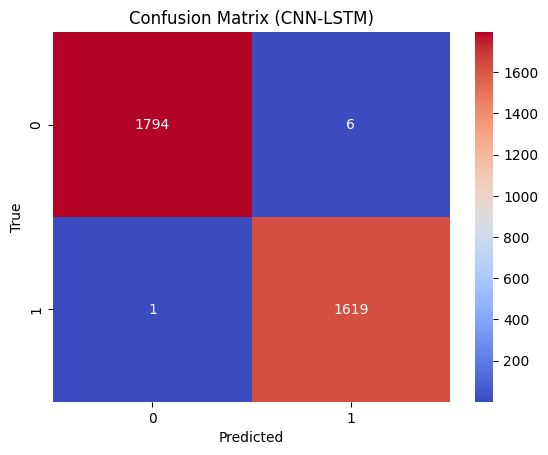

Plotting ROC curve...


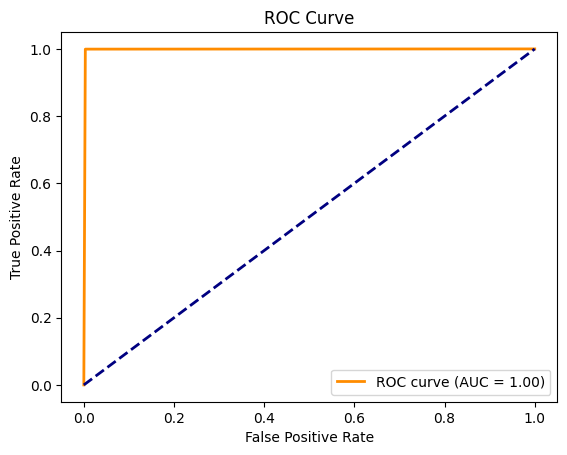

Plotting training history...


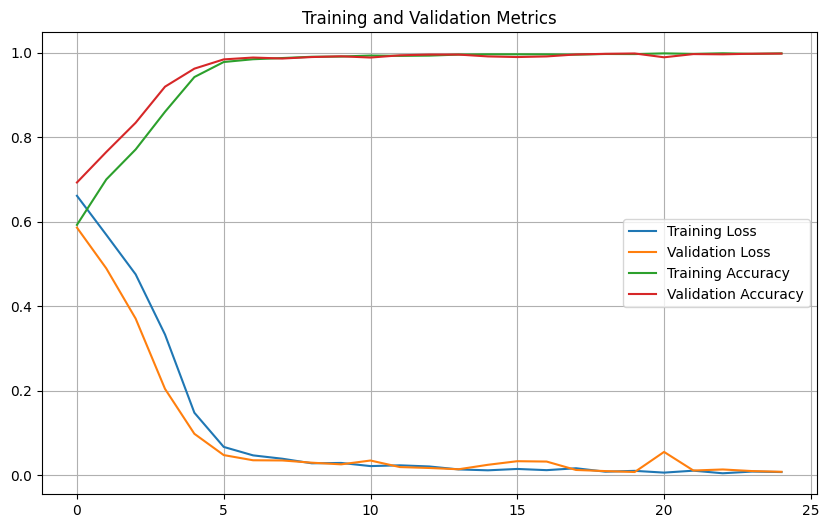

Starting 5-Fold and 10-Fold cross-validation...
Saving all evaluation metrics...


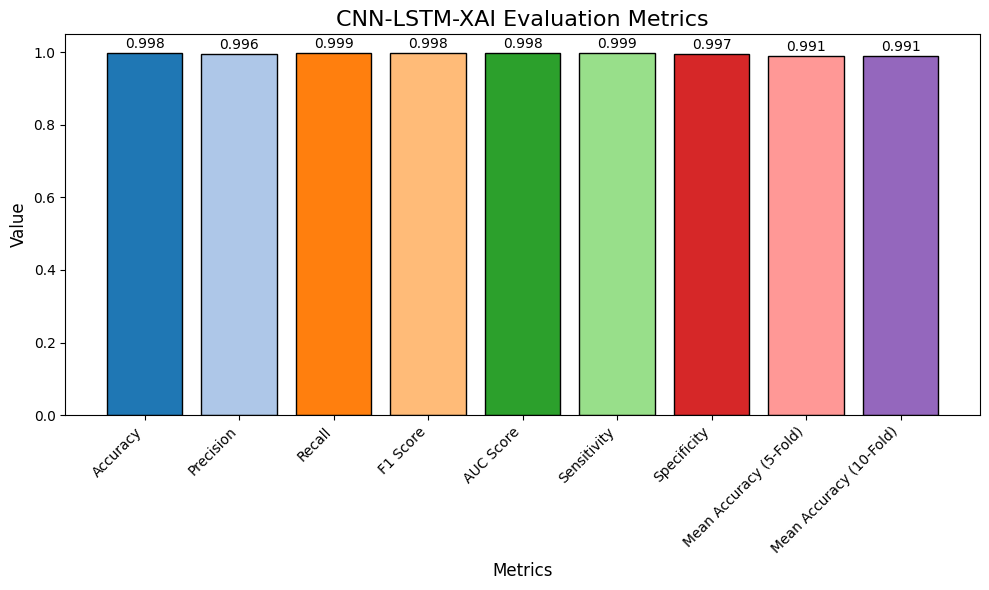


🎯 All tasks completed successfully! 🎯

🎯 Here are the Metrics for your analysis 🎯 
 
                      Metrics      Value
0              Elapsed Time  39.470437
1                  Accuracy   0.997953
2                 Precision   0.996308
3                    Recall   0.999383
4                  F1 Score   0.997843
5                 AUC Score   0.998025
6               Sensitivity   0.999383
7               Specificity   0.996667
8    Mean Accuracy (5-Fold)   0.990860
9    Std Deviation (5-Fold)   0.003620
10  Mean Accuracy (10-Fold)   0.991299
11  Std Deviation (10-Fold)   0.002684


<Figure size 640x480 with 0 Axes>

In [5]:
# Evaluation
print("Model evaluation started...")
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = (outputs > 0.5).float()
        test_preds.append(preds.cpu())
        test_labels.append(labels.cpu())

test_preds = torch.cat(test_preds)
test_labels = torch.cat(test_labels)

y_pred_proba = test_preds.numpy()
y_true = test_labels.numpy()
y_pred = (y_pred_proba > 0.5).astype(int)

# Save Classification Report
report = classification_report(y_true, y_pred)
with open(os.path.join(output_dir, '6_classification_report.txt'), 'w') as f:
    f.write(report)
print(report)

# Confusion Matrix
print("Plotting confusion matrix...")
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix (CNN-LSTM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(os.path.join(output_dir, '4_CNNLSTM_Confusion_Matrix.svg'))
plt.show()

# ROC Curve
print("Plotting ROC curve...")
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
if len(fpr) > 10:
    plt.scatter(fpr[::max(1, len(fpr)//10)], tpr[::max(1, len(tpr)//10)], color='red', s=40)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig(os.path.join(output_dir, '5_CNNLSTM_ROC.svg'))
plt.show()

# Metrics
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Save Epoch History
pd.DataFrame(history).to_csv(os.path.join(output_dir, '7_CNNLSTM_Epoch_History.csv'), index=False)

# Plot Training History
print("Plotting training history...")
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Metrics')
plt.savefig(os.path.join(output_dir, '8_CNNLSTM_Epochs.svg'))
plt.show()

# Cross-validation
print("Starting 5-Fold and 10-Fold cross-validation...")

def run_cross_validation(X_train, y_train, n_splits):
    skf = StratifiedKFold(n_splits=n_splits)
    scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        model_cv = CNNLSTM(input_size=X_train.shape[1]).to(device)
        optimizer_cv = optim.Adam(model_cv.parameters(), lr=0.001)
        criterion_cv = nn.BCELoss()

        X_fold_train = torch.tensor(X_train[train_idx], dtype=torch.float32).to(device)
        y_fold_train = torch.tensor(y_train[train_idx], dtype=torch.float32).unsqueeze(1).to(device)
        X_fold_val = torch.tensor(X_train[val_idx], dtype=torch.float32).to(device)
        y_fold_val = torch.tensor(y_train[val_idx], dtype=torch.float32).unsqueeze(1).to(device)

        train_dataset = TensorDataset(X_fold_train, y_fold_train)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model_cv.train()
        for _ in range(10):
            for inputs, labels in train_loader:
                optimizer_cv.zero_grad()
                outputs = model_cv(inputs)
                loss = criterion_cv(outputs, labels)
                loss.backward()
                optimizer_cv.step()

        val_dataset = TensorDataset(X_fold_val, y_fold_val)
        val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

        model_cv.eval()
        val_preds = []
        val_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs_val = model_cv(inputs)
                preds_val = (outputs_val > 0.5).float()
                val_preds.append(preds_val)
                val_labels.append(labels)

        val_preds = torch.cat(val_preds)
        val_labels = torch.cat(val_labels)

        acc = (val_preds == val_labels).float().mean().item()
        scores.append(acc)

    return np.array(scores)

scores_5_fold = run_cross_validation(X_train, y_train, 5)
scores_10_fold = run_cross_validation(X_train, y_train, 10)

# Save Metrics
print("Saving all evaluation metrics...")
metrics = {
    'Elapsed Time': elapsed_time_cnn_lstm,
    'Accuracy': accuracy_score(y_true, y_pred),
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC Score': roc_auc,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Mean Accuracy (5-Fold)': scores_5_fold.mean(),
    'Std Deviation (5-Fold)': scores_5_fold.std(),
    'Mean Accuracy (10-Fold)': scores_10_fold.mean(),
    'Std Deviation (10-Fold)': scores_10_fold.std()
}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metrics', 'Value'])
metrics_df.to_csv(os.path.join(output_dir, '9_CNNLSTM_ALL_Metrics.csv'), index=False)


# Filter the metrics from the existing DataFrame
metrics_to_plot = metrics_df[
    ~metrics_df['Metrics'].isin(['Elapsed Time', 'Std Deviation (5-Fold)', 'Std Deviation (10-Fold)'])
]

# Sort the order if desired (optional)
# metrics_to_plot = metrics_to_plot.sort_values(by='Value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors[:len(metrics_to_plot)]

bars = plt.bar(
    metrics_to_plot['Metrics'],
    metrics_to_plot['Value'],
    color=colors,
    edgecolor='black'
)

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Labels and styling
plt.title('CNN-LSTM Evaluation Metrics', fontsize=16)
plt.ylabel('Value', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')

# Save and display
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '10_Final_Metrics_CNNLSTM.svg'), format='svg')
plt.show()
plt.clf()

print("\n🎯 All tasks completed successfully! 🎯")

print("\n🎯 Here are the Metrics for your analysis 🎯 \n \n ", metrics_df)

## 4.6 Predicting on Blind Dataset

In [10]:
# ========== Model Definition ==========
class CNNLSTM(nn.Module):
    def __init__(self, input_size):
        super(CNNLSTM, self).__init__()
        self.conv1d = nn.Conv1d(1, 64, kernel_size=5)
        self.batchnorm = nn.BatchNorm1d(64)
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.lstm = nn.LSTM(64, 64, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv1d(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.permute(0, 2, 1)
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# ========== Scoring Function ==========
def score_active_unlabeled_compounds(input_csv, model_path, output_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    print(f"📥 Loading input from: {input_csv}")
    df = pd.read_csv(input_csv)

    # Extract Compound IDs
    if 'Compound_ID' in df.columns:
        compound_ids = df['Compound_ID'].values
        df = df.drop(columns=['Compound_ID'])
    else:
        compound_ids = np.arange(len(df))

    # Prepare input tensor
    input_data = df.values
    input_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(-1).to(device)

    # Load model and weights
    model = CNNLSTM(input_size=input_tensor.shape[1]).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    print(f"🚀 Predicting scores using model on device: {device}")
    preds = []
    with torch.no_grad():
        for i in range(0, input_tensor.shape[0], 128):
            batch = input_tensor[i:i+128]
            output = model(batch)
            preds.append(output.squeeze().cpu().numpy())

    raw_preds = np.concatenate(preds)

    # Scoring: 0 = Inactive; 1–10 = Active with strength
    scaled_scores = np.where(
        raw_preds < 1e-4,  # near zero → Inactive
        0.0,
        1.0 + 9.0 * raw_preds  # scale 0–1 → 1–10
    )

    # Save results
    scored_df = pd.DataFrame({
        'Compound_ID': compound_ids,
        'Model_Raw_Prediction': raw_preds,
        'Scaled_Score_0_to_10': scaled_scores
    })

    scored_df.to_csv(output_path, index=False)
    print(f"✅ Saved scored compounds to: {output_path}")

# ========== Run Scoring ==========
input_csv_path = '/home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors_Top2000_Descriptors_No_Activity.csv'
model_weight_path = '/home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/1_CNN_LSTM_XAI.pth'
output_score_path = '/home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/31_Compound_Scores-CNN-LSTM-XAI.csv'

score_active_unlabeled_compounds(input_csv=input_csv_path,
                                 model_path=model_weight_path,
                                 output_path=output_score_path)

📥 Loading input from: /home/nagmibano/Desktop/Deep_Learning/DL/Merged_Active_Inactive_Common_Descriptors_Top2000_Descriptors_No_Activity.csv


/tmp/ipykernel_24217/1159611074.py:32: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv)


🚀 Predicting scores using model on device: cuda
✅ Saved scored compounds to: /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/31_Compound_Scores-CNN-LSTM-XAI.csv


## 4.7 Explanable AI (XAI)

### 4.7.1 XAI with Hybrid Feature Importance
by evaluating accuracy drop, prediction flip ratio, and log-loss increase after feature-wise permutation. This method merges all three metrics to produce a comprehensive importance score for each input feature.

In [7]:
# ============================
# Hybrid Feature Scoring Logic
# ============================
def hybrid_feature_scorer(model, X, y, feature_idx, batch_size=100):
    model.eval()
    X_orig = X.copy()
    y_true = y

    with torch.no_grad():
        preds_orig, probs_orig = [], []
        for i in range(0, X_orig.shape[0], batch_size):
            batch = torch.tensor(X_orig[i:i+batch_size], dtype=torch.float32).to(device)
            outputs = model(batch)
            preds_orig.append((outputs > 0.5).cpu().numpy())
            probs_orig.append(outputs.cpu().numpy())
        preds_orig = np.vstack(preds_orig)
        probs_orig = np.vstack(probs_orig)

    acc_orig = accuracy_score(y_true, preds_orig)
    loss_orig = log_loss(y_true, probs_orig)

    # Perturb one feature
    X_perturbed = X_orig.copy()
    X_perturbed[:, feature_idx, 0] = np.random.permutation(X_perturbed[:, feature_idx, 0])

    with torch.no_grad():
        preds_perturbed, probs_perturbed = [], []
        for i in range(0, X_perturbed.shape[0], batch_size):
            batch = torch.tensor(X_perturbed[i:i+batch_size], dtype=torch.float32).to(device)
            outputs = model(batch)
            preds_perturbed.append((outputs > 0.5).cpu().numpy())
            probs_perturbed.append(outputs.cpu().numpy())
        preds_perturbed = np.vstack(preds_perturbed)
        probs_perturbed = np.vstack(probs_perturbed)

    acc_perturbed = accuracy_score(y_true, preds_perturbed)
    loss_perturbed = log_loss(y_true, probs_perturbed)

    accuracy_drop = acc_orig - acc_perturbed
    flip_ratio = np.mean(preds_orig != preds_perturbed)
    logloss_increase = loss_perturbed - loss_orig

    return accuracy_drop, flip_ratio, logloss_increase

def normalize(arr):
    arr = np.array(arr)
    return (arr - arr.min()) / (arr.max() - arr.min() + 1e-8)

print("\n🔍 Computing Hybrid Feature Importance by evaluating accuracy drop, prediction flip ratio, and log-loss increase after feature-wise permutation. This method merges all three metrics to produce a comprehensive importance score for each input feature. \n \n \n")

feature_indices = list(range(X_test.shape[1]))
batch_size_perm = 100

acc_drops, flip_ratios, logloss_diffs = [], [], []
for idx in tqdm(feature_indices, desc="Hybrid Permutation Feature Computation"):
    acc, flip, logdiff = hybrid_feature_scorer(model, X_test, y_test, feature_idx=idx, batch_size=batch_size_perm)
    acc_drops.append(acc)
    flip_ratios.append(flip)
    logloss_diffs.append(logdiff)

acc_drops_norm = normalize(acc_drops)
flip_ratios_norm = normalize(flip_ratios)
logloss_diffs_norm = normalize(logloss_diffs)
hybrid_scores = (acc_drops_norm + flip_ratios_norm + logloss_diffs_norm) / 3.0

hybrid_df = pd.DataFrame({
    'Feature': feature_names,
    'Accuracy_Drop': acc_drops,
    'Flip_Ratio': flip_ratios,
    'LogLoss_Change': logloss_diffs,
    'Hybrid_Importance': hybrid_scores
}).sort_values(by='Hybrid_Importance', ascending=False)
# Save CSV (for external use)
hybrid_df.to_csv(os.path.join(output_dir, '11_Hybrid_Feature_Importance.csv'), index=False)

# ✅ Optional: Save as Pickle (for fast reuse in future scripts or notebooks)
hybrid_pickle_path = os.path.join(output_dir, '11_Hybrid_Feature_Importance.pkl')
hybrid_df.to_pickle(hybrid_pickle_path)
print(f"🔁 Hybrid feature scores saved to: {hybrid_pickle_path}")


# ============================
# Plotting Utilities
# ============================
def plot_bar(df, filename_prefix, title, xlabel, top=True, name_col='Feature'):
    subset = df.head(10) if top else df.tail(10)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(subset[name_col], subset['Importance'])
    plt.xlabel(xlabel)
    plt.ylabel("Compound ID" if name_col == 'Compound_ID' else "Feature")
    plt.title(title)
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center')
    plt.tight_layout()
    suffix = "_top.svg" if top else "_least.svg"
    plt.savefig(os.path.join(output_dir, filename_prefix + suffix), dpi=100)
    plt.close()

def plot_component_bar(metric_vals, title, filename_prefix):
    df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': metric_vals
    }).sort_values(by='Importance', ascending=False)
    plot_bar(df, filename_prefix, title + " - Top", 'Importance', top=True)
    plot_bar(df, filename_prefix, title + " - Least", 'Importance', top=False)

def plot_corr(X_data, filename_prefix, title, labels, top_n=50):
    top_features = hybrid_df.head(top_n)['Feature'].values
    top_indices = [labels.index(f) for f in top_features if f in labels]
    X_subset = X_data[top_indices, :]
    selected_labels = [labels[i] for i in top_indices]
    corr = np.corrcoef(X_subset)
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', xticklabels=selected_labels, yticklabels=selected_labels)
    plt.title(title + f" (Top {top_n} Features)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename_prefix + f"_top{top_n}.svg"), dpi=100)
    plt.close()

# ============================
# Generate Feature Visualizations
# ============================
plot_bar(hybrid_df[['Feature', 'Hybrid_Importance']].rename(columns={'Hybrid_Importance': 'Importance'}),
         '12_Hybrid_Feature_Importance', 'Top Features (Hybrid)', 'Importance', top=True)
plot_bar(hybrid_df[['Feature', 'Hybrid_Importance']].rename(columns={'Hybrid_Importance': 'Importance'}),
         '13_Hybrid_Feature_Importance', 'Least Features (Hybrid)', 'Importance', top=False)
plot_component_bar(acc_drops, 'Accuracy Drop', '14_Feature_AccuracyDrop')
plot_component_bar(flip_ratios, 'Flip Ratio', '15_Feature_FlipRatio')
plot_component_bar(logloss_diffs, 'Log-Loss Change', '16_Feature_LogLoss')
plot_corr(X_test_flat.T, '17_Hybrid_Feature_Correlation', 'Feature Correlation (Hybrid)', feature_names, top_n=50)

# ============================
# Compound Importance
# ============================
def custom_scorer_batch(model, X, y, batch_size=100):
    model.eval()
    all_probs = []
    with torch.no_grad():
        for start in range(0, X.shape[0], batch_size):
            end = min(start + batch_size, X.shape[0])
            X_tensor = torch.tensor(X[start:end], dtype=torch.float32).to(device)
            outputs = model(X_tensor)
            all_probs.append(outputs.cpu().numpy())
    probs = np.vstack(all_probs)
    return probs.mean()  # mean probability of being active

print("\n\U0001F9EC Computing Compound Importance (Hybrid)...")
compound_perm_scores = []
compound_ids = []
for i in tqdm(range(X_test.shape[0]), desc="Compound Permutation"):
    if y_test[i] == 1:
        score = custom_scorer_batch(model, X_test[i:i+1], y_test[i:i+1], batch_size=batch_size_perm)
        compound_perm_scores.append(score)
        compound_ids.append(data['Compound_ID'].iloc[X_train.shape[0] + i])

compound_perm_df = pd.DataFrame({
    'Compound_ID': compound_ids,
    'Raw_Probability': compound_perm_scores
})
compound_perm_df['Normalized_Score'] = normalize(compound_perm_df['Raw_Probability']) * 10
compound_perm_df.to_csv(os.path.join(output_dir, '18_Hybrid_Compound_Importance.csv'), index=False)

# ============================
# Compound Ranking
# ============================
compound_perm_df['Avg_Score'] = compound_perm_df['Normalized_Score']  # Only one method here
compound_perm_df = compound_perm_df[['Compound_ID', 'Raw_Probability', 'Normalized_Score', 'Avg_Score']]
active_compounds = data[data['Activity'] == 1]
compound_perm_df = compound_perm_df[compound_perm_df['Compound_ID'].isin(active_compounds['Compound_ID'])]
compound_perm_df = compound_perm_df.sort_values(by='Avg_Score', ascending=False).reset_index(drop=True)
compound_perm_df.to_csv(os.path.join(output_dir, '19_Hybrid_Ranked_Compounds.csv'), index=False)

# ============================
# Compound Correlation Plot
# ============================
compound_plot_df = compound_perm_df[['Compound_ID', 'Normalized_Score']].rename(columns={'Normalized_Score': 'Importance'})
plot_bar(compound_plot_df, '20_Hybrid_Compound_Importance', 'Top Compounds', 'Normalized_Score', top=True, name_col='Compound_ID')
plot_bar(compound_plot_df, '21_Hybrid_Compound_Importance', 'Least Compounds', 'Normalized_Score', top=False, name_col='Compound_ID')

print("\n\u2705 All XAI output files (11 to 21) saved successfully!")


🔍 Computing Hybrid Feature Importance by evaluating accuracy drop, prediction flip ratio, and log-loss increase after feature-wise permutation. This method merges all three metrics to produce a comprehensive importance score for each input feature. 
 
 



Hybrid Permutation Feature Computation: 100%|█| 2000/2000 [15:33<00:00,  2.14it/


🔁 Hybrid feature scores saved to: /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/11_Hybrid_Feature_Importance.pkl

🧬 Computing Compound Importance (Hybrid)...


Compound Permutation: 100%|███████████████| 3420/3420 [00:02<00:00, 1186.47it/s]



✅ All XAI output files (11 to 21) saved successfully!


### 4.7.2 XAI with LIME

In [8]:
# ==============================
# LIME: Feature & Compound Importance
# ==============================

print(f"✅ Using device for model inference: {device}")

# Constants (adjust as needed)
NUM_FEATURES = len(feature_names)
BATCH_SIZE = 200
TOTAL_SAMPLES = X_test.shape[0]

all_feature_importances = []
compound_records = []

from lime import lime_tabular

# Flattened test data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_flat,
    mode='classification',
    feature_names=feature_names,
    class_names=['Inactive', 'Active'],
    discretize_continuous=False,
    verbose=False
)

# Define prediction wrapper
def predict_lime_gpu(input_flat):
    input_reshaped = input_flat.reshape(-1, X_test.shape[1], 1)
    with torch.no_grad():
        x_tensor = torch.tensor(input_reshaped, dtype=torch.float32).to(device)
        logits = model(x_tensor)
        probs = torch.cat([1 - logits, logits], dim=1)  # shape: (batch, 2)
    return probs.cpu().numpy()


print(f"🚀 Processing {TOTAL_SAMPLES} samples in batches of {BATCH_SIZE}...")
for batch_start in tqdm(range(0, TOTAL_SAMPLES, BATCH_SIZE), desc="LIME Batches"):
    batch_end = min(batch_start + BATCH_SIZE, TOTAL_SAMPLES)
    for i in range(batch_start, batch_end):
        compound_index = X_train.shape[0] + i
        compound_id = data['Compound_ID'].iloc[compound_index]

        try:
            t0 = time.time()
            exp = lime_explainer.explain_instance(
                X_test_flat[i],
                predict_lime_gpu,
                num_features=NUM_FEATURES,
                num_samples=300
            )
            elapsed = time.time() - t0

            local_importance = np.array([dict(exp.as_list()).get(f, 0) for f in feature_names])
            all_feature_importances.append(np.abs(local_importance))

            if y_test[i] == 1:
                compound_score = np.sum(np.abs(local_importance))
                compound_records.append((compound_id, compound_score))

            if (i + 1) % 25 == 0 or i == batch_end - 1:
                print(f"🔹 Sample {i+1}/{TOTAL_SAMPLES} | Compound ID: {compound_id} | Time: {elapsed:.1f}s | Device: {device}")

        except Exception as e:
            print(f"[⚠️ LIME ERROR - Sample {i}] {e}")
            continue

print("\n🎯 LIME Computations Completed, Plot and CSVs are being saved 🎯")

# Save raw importance data
with open(os.path.join(output_dir, '22_LIME_Feature_Importances.pkl'), 'wb') as f:
    pickle.dump(all_feature_importances, f)

with open(os.path.join(output_dir, '22_LIME_Compound_Records.pkl'), 'wb') as f:
    pickle.dump(compound_records, f)
np.save(os.path.join(output_dir, '22_LIME_Feature_Importances.npy'), np.array(all_feature_importances))
np.save(os.path.join(output_dir, '22_LIME_Compound_Records.npy'), np.array(compound_records, dtype=object))

print("LIME weight is saved in npy and pkl format, no need to compute it again")


# ============================
# LIME Feature Importance
# ============================
avg_importance = np.mean(np.array(all_feature_importances), axis=0)
lime_feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_importance
}).sort_values(by='Importance', ascending=False)
lime_feature_df.to_csv(os.path.join(output_dir, '22_LIME_Feature_Importance.csv'), index=False)

# ============================
# LIME Feature Plots
# ============================
print("\n📊 Plotting LIME Feature Visualizations...")
plot_bar(lime_feature_df, '23_LIME_Feature_Importance', 'LIME Top Features', 'Importance', top=True)
plot_bar(lime_feature_df, '24_LIME_Feature_Importance', 'LIME Least Features', 'Importance', top=False)
plot_corr(X_test_flat.T, '25_LIME_Feature_Correlation', 'LIME Feature Correlation', feature_names)

# ============================
# LIME Compound Importance
# ============================
compound_lime_df = pd.DataFrame(compound_records, columns=['Compound_ID', 'Importance'])
compound_lime_df.to_csv(os.path.join(output_dir, '26_LIME_Compound_Importance.csv'), index=False)
plot_bar(compound_lime_df, '27_LIME_Compound_Importance', 'LIME Top Compounds', 'Importance', top=True, name_col='Compound_ID')
plot_bar(compound_lime_df, '28_LIME_Compound_Importance', 'LIME Least Compounds', 'Importance', top=False, name_col='Compound_ID')

# ============================
# LIME Compound Correlation
# ============================
print("\n📊 Creating compact LIME Compound Correlation heatmap...")

top_n = 50
top_compounds = data.iloc[X_train.shape[0]:X_train.shape[0]+len(X_test_flat)]
top_ids = top_compounds['Compound_ID'].values[:top_n].astype(str)
X_subset = X_test_flat[:top_n]

def plot_compound_corr(X_data, filename_prefix, title, index_labels):
    corr = np.corrcoef(X_data)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr,
        cmap='coolwarm',
        xticklabels=index_labels,
        yticklabels=index_labels,
        cbar=True
    )
    plt.title(title)
    plt.xlabel("Compound ID")
    plt.ylabel("Compound ID")
    plt.xticks(rotation=90, fontsize=6)
    plt.yticks(rotation=0, fontsize=6)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename_prefix + ".svg"), dpi=100)
    plt.close()

plot_compound_corr(X_subset, '29_LIME_Compound_Correlation', 'LIME Compound Correlation (Top 50)', top_ids)

# ============================
# LIME Compound Ranking
# ============================
print("\n🧬 Ranking Compounds (LIME)...")
active_compounds = data[data['Activity'] == 1]
compound_lime_df['Score'] = pd.qcut(compound_lime_df['Importance'], q=10, labels=False, duplicates='drop')
compound_lime_df['Score'] = 11 - compound_lime_df['Score']
compound_lime_df = compound_lime_df[compound_lime_df['Compound_ID'].isin(active_compounds['Compound_ID'])]
compound_lime_df.to_csv(os.path.join(output_dir, '30_Ranked_Compounds_LIME.csv'), index=False)

print("\n✅ LIME Analysis Completed Successfully. Files 22 to 30 saved.")


✅ Using device for model inference: cuda
🚀 Processing 3420 samples in batches of 200...


LIME Batches:   0%|                                      | 0/18 [00:00<?, ?it/s]

🔹 Sample 25/3420 | Compound ID: 4840482 | Time: 0.1s | Device: cuda
🔹 Sample 50/3420 | Compound ID: 16034459 | Time: 0.1s | Device: cuda
🔹 Sample 75/3420 | Compound ID: 9552027 | Time: 0.1s | Device: cuda
🔹 Sample 100/3420 | Compound ID: 1460454 | Time: 0.1s | Device: cuda
🔹 Sample 125/3420 | Compound ID: 884957 | Time: 0.1s | Device: cuda
🔹 Sample 150/3420 | Compound ID: 828241 | Time: 0.1s | Device: cuda
🔹 Sample 175/3420 | Compound ID: 658914 | Time: 0.1s | Device: cuda


LIME Batches:   6%|█▌                           | 1/18 [02:16<38:40, 136.49s/it]

🔹 Sample 200/3420 | Compound ID: 2571709 | Time: 0.1s | Device: cuda
🔹 Sample 225/3420 | Compound ID: 656057 | Time: 0.1s | Device: cuda
🔹 Sample 250/3420 | Compound ID: 531848 | Time: 0.1s | Device: cuda
🔹 Sample 275/3420 | Compound ID: 2544883 | Time: 0.1s | Device: cuda
🔹 Sample 300/3420 | Compound ID: 3129415 | Time: 0.1s | Device: cuda
🔹 Sample 325/3420 | Compound ID: 24818332 | Time: 0.1s | Device: cuda
🔹 Sample 350/3420 | Compound ID: 3172637 | Time: 0.1s | Device: cuda
🔹 Sample 375/3420 | Compound ID: 135399221 | Time: 0.1s | Device: cuda


LIME Batches:  11%|███▏                         | 2/18 [04:32<36:20, 136.28s/it]

🔹 Sample 400/3420 | Compound ID: 650697 | Time: 0.1s | Device: cuda
🔹 Sample 425/3420 | Compound ID: 20899343 | Time: 0.1s | Device: cuda
🔹 Sample 450/3420 | Compound ID: 974925 | Time: 0.1s | Device: cuda
🔹 Sample 475/3420 | Compound ID: 135513623 | Time: 0.1s | Device: cuda
🔹 Sample 500/3420 | Compound ID: 7314606 | Time: 0.1s | Device: cuda
🔹 Sample 525/3420 | Compound ID: 24792534 | Time: 0.1s | Device: cuda
🔹 Sample 550/3420 | Compound ID: 659888 | Time: 0.1s | Device: cuda
🔹 Sample 575/3420 | Compound ID: 4322020 | Time: 0.1s | Device: cuda


LIME Batches:  17%|████▊                        | 3/18 [06:48<34:03, 136.23s/it]

🔹 Sample 600/3420 | Compound ID: 2999003 | Time: 0.1s | Device: cuda
🔹 Sample 625/3420 | Compound ID: 20892042 | Time: 0.1s | Device: cuda
🔹 Sample 650/3420 | Compound ID: 978928 | Time: 0.1s | Device: cuda
🔹 Sample 675/3420 | Compound ID: 3245464 | Time: 0.1s | Device: cuda
🔹 Sample 700/3420 | Compound ID: 135504902 | Time: 0.1s | Device: cuda
🔹 Sample 725/3420 | Compound ID: 2678429 | Time: 0.1s | Device: cuda
🔹 Sample 750/3420 | Compound ID: 135651303 | Time: 0.2s | Device: cuda
🔹 Sample 775/3420 | Compound ID: 717254 | Time: 0.1s | Device: cuda


LIME Batches:  22%|██████▍                      | 4/18 [09:05<31:49, 136.42s/it]

🔹 Sample 800/3420 | Compound ID: 24793758 | Time: 0.1s | Device: cuda
🔹 Sample 825/3420 | Compound ID: 661642 | Time: 0.1s | Device: cuda
🔹 Sample 850/3420 | Compound ID: 2925806 | Time: 0.2s | Device: cuda
🔹 Sample 875/3420 | Compound ID: 3240154 | Time: 0.1s | Device: cuda
🔹 Sample 900/3420 | Compound ID: 1648923 | Time: 0.1s | Device: cuda
🔹 Sample 925/3420 | Compound ID: 3231927 | Time: 0.1s | Device: cuda
🔹 Sample 950/3420 | Compound ID: 5010546 | Time: 0.1s | Device: cuda
🔹 Sample 975/3420 | Compound ID: 6877185 | Time: 0.1s | Device: cuda


LIME Batches:  28%|████████                     | 5/18 [11:24<29:43, 137.19s/it]

🔹 Sample 1000/3420 | Compound ID: 5310645 | Time: 0.1s | Device: cuda
🔹 Sample 1025/3420 | Compound ID: 2741547 | Time: 0.1s | Device: cuda
🔹 Sample 1050/3420 | Compound ID: 24819462 | Time: 0.1s | Device: cuda
🔹 Sample 1075/3420 | Compound ID: 2948378 | Time: 0.1s | Device: cuda
🔹 Sample 1100/3420 | Compound ID: 16025149 | Time: 0.1s | Device: cuda
🔹 Sample 1125/3420 | Compound ID: 3101356 | Time: 0.1s | Device: cuda
🔹 Sample 1150/3420 | Compound ID: 17574992 | Time: 0.1s | Device: cuda
🔹 Sample 1175/3420 | Compound ID: 5977999 | Time: 0.1s | Device: cuda


LIME Batches:  33%|█████████▋                   | 6/18 [13:43<27:33, 137.80s/it]

🔹 Sample 1200/3420 | Compound ID: 24792722 | Time: 0.1s | Device: cuda
🔹 Sample 1225/3420 | Compound ID: 3145417 | Time: 0.1s | Device: cuda
🔹 Sample 1250/3420 | Compound ID: 3242065 | Time: 0.1s | Device: cuda
🔹 Sample 1275/3420 | Compound ID: 24791368 | Time: 0.1s | Device: cuda
🔹 Sample 1300/3420 | Compound ID: 2111212 | Time: 0.1s | Device: cuda
🔹 Sample 1325/3420 | Compound ID: 2219830 | Time: 0.1s | Device: cuda
🔹 Sample 1350/3420 | Compound ID: 22430499 | Time: 0.1s | Device: cuda
🔹 Sample 1375/3420 | Compound ID: 23723713 | Time: 0.1s | Device: cuda


LIME Batches:  39%|███████████▎                 | 7/18 [16:00<25:14, 137.68s/it]

🔹 Sample 1400/3420 | Compound ID: 650412 | Time: 0.1s | Device: cuda
🔹 Sample 1425/3420 | Compound ID: 6882959 | Time: 0.2s | Device: cuda
🔹 Sample 1450/3420 | Compound ID: 3311680 | Time: 0.1s | Device: cuda
🔹 Sample 1475/3420 | Compound ID: 16192298 | Time: 0.1s | Device: cuda
🔹 Sample 1500/3420 | Compound ID: 24817092 | Time: 0.1s | Device: cuda
🔹 Sample 1525/3420 | Compound ID: 2291671 | Time: 0.1s | Device: cuda
🔹 Sample 1550/3420 | Compound ID: 6103255 | Time: 0.1s | Device: cuda
🔹 Sample 1575/3420 | Compound ID: 5432420 | Time: 0.1s | Device: cuda


LIME Batches:  44%|████████████▉                | 8/18 [18:19<23:01, 138.19s/it]

🔹 Sample 1600/3420 | Compound ID: 838732 | Time: 0.1s | Device: cuda
🔹 Sample 1625/3420 | Compound ID: 1589729 | Time: 0.1s | Device: cuda
🔹 Sample 1650/3420 | Compound ID: 963505 | Time: 0.1s | Device: cuda
🔹 Sample 1675/3420 | Compound ID: 1441865 | Time: 0.1s | Device: cuda
🔹 Sample 1700/3420 | Compound ID: 3866965 | Time: 0.1s | Device: cuda
🔹 Sample 1725/3420 | Compound ID: 653959 | Time: 0.1s | Device: cuda
🔹 Sample 1750/3420 | Compound ID: 11948728 | Time: 0.1s | Device: cuda
🔹 Sample 1775/3420 | Compound ID: 1488444 | Time: 0.1s | Device: cuda


LIME Batches:  50%|██████████████▌              | 9/18 [20:38<20:43, 138.22s/it]

🔹 Sample 1800/3420 | Compound ID: 9589996 | Time: 0.2s | Device: cuda
🔹 Sample 1825/3420 | Compound ID: 2484288 | Time: 0.1s | Device: cuda
🔹 Sample 1850/3420 | Compound ID: 236275 | Time: 0.1s | Device: cuda
🔹 Sample 1875/3420 | Compound ID: 762621 | Time: 0.1s | Device: cuda
🔹 Sample 1900/3420 | Compound ID: 24791518 | Time: 0.1s | Device: cuda
🔹 Sample 1925/3420 | Compound ID: 1968406 | Time: 0.1s | Device: cuda
🔹 Sample 1950/3420 | Compound ID: 2802550 | Time: 0.1s | Device: cuda
🔹 Sample 1975/3420 | Compound ID: 12004942 | Time: 0.3s | Device: cuda


LIME Batches:  56%|███████████████▌            | 10/18 [22:57<18:28, 138.53s/it]

🔹 Sample 2000/3420 | Compound ID: 6470016 | Time: 0.1s | Device: cuda
🔹 Sample 2025/3420 | Compound ID: 1570576 | Time: 0.2s | Device: cuda
🔹 Sample 2050/3420 | Compound ID: 3953394 | Time: 0.1s | Device: cuda
🔹 Sample 2075/3420 | Compound ID: 16303266 | Time: 0.1s | Device: cuda
🔹 Sample 2100/3420 | Compound ID: 646836 | Time: 0.1s | Device: cuda
🔹 Sample 2125/3420 | Compound ID: 2959365 | Time: 0.2s | Device: cuda
🔹 Sample 2150/3420 | Compound ID: 16193532 | Time: 0.2s | Device: cuda
🔹 Sample 2175/3420 | Compound ID: 743276 | Time: 0.1s | Device: cuda


LIME Batches:  61%|█████████████████           | 11/18 [25:14<16:06, 138.01s/it]

🔹 Sample 2200/3420 | Compound ID: 6900072 | Time: 0.1s | Device: cuda
🔹 Sample 2225/3420 | Compound ID: 659740 | Time: 0.1s | Device: cuda
🔹 Sample 2250/3420 | Compound ID: 3207162 | Time: 0.1s | Device: cuda
🔹 Sample 2275/3420 | Compound ID: 739217 | Time: 0.1s | Device: cuda
🔹 Sample 2300/3420 | Compound ID: 2863219 | Time: 0.1s | Device: cuda
🔹 Sample 2325/3420 | Compound ID: 6872563 | Time: 0.1s | Device: cuda
🔹 Sample 2350/3420 | Compound ID: 658970 | Time: 0.1s | Device: cuda
🔹 Sample 2375/3420 | Compound ID: 9551400 | Time: 0.1s | Device: cuda


LIME Batches:  67%|██████████████████▋         | 12/18 [27:33<13:49, 138.29s/it]

🔹 Sample 2400/3420 | Compound ID: 3241772 | Time: 0.1s | Device: cuda
🔹 Sample 2425/3420 | Compound ID: 5794680 | Time: 0.2s | Device: cuda
🔹 Sample 2450/3420 | Compound ID: 3247314 | Time: 0.1s | Device: cuda
🔹 Sample 2475/3420 | Compound ID: 2802688 | Time: 0.1s | Device: cuda
🔹 Sample 2500/3420 | Compound ID: 666957 | Time: 0.2s | Device: cuda
🔹 Sample 2525/3420 | Compound ID: 2968318 | Time: 0.1s | Device: cuda
🔹 Sample 2550/3420 | Compound ID: 655146 | Time: 0.1s | Device: cuda
🔹 Sample 2575/3420 | Compound ID: 2900835 | Time: 0.1s | Device: cuda


LIME Batches:  72%|████████████████████▏       | 13/18 [29:50<11:30, 138.02s/it]

🔹 Sample 2600/3420 | Compound ID: 2951269 | Time: 0.1s | Device: cuda
🔹 Sample 2625/3420 | Compound ID: 3765924 | Time: 0.1s | Device: cuda
🔹 Sample 2650/3420 | Compound ID: 788408 | Time: 0.1s | Device: cuda
🔹 Sample 2675/3420 | Compound ID: 2936390 | Time: 0.1s | Device: cuda
🔹 Sample 2700/3420 | Compound ID: 5937411 | Time: 0.1s | Device: cuda
🔹 Sample 2725/3420 | Compound ID: 650108 | Time: 0.1s | Device: cuda
🔹 Sample 2750/3420 | Compound ID: 6038696 | Time: 0.2s | Device: cuda
🔹 Sample 2775/3420 | Compound ID: 1080296 | Time: 0.1s | Device: cuda


LIME Batches:  78%|█████████████████████▊      | 14/18 [32:09<09:13, 138.46s/it]

🔹 Sample 2800/3420 | Compound ID: 666405 | Time: 0.1s | Device: cuda
🔹 Sample 2825/3420 | Compound ID: 5771619 | Time: 0.1s | Device: cuda
🔹 Sample 2850/3420 | Compound ID: 17581803 | Time: 0.1s | Device: cuda
🔹 Sample 2875/3420 | Compound ID: 235110 | Time: 0.1s | Device: cuda
🔹 Sample 2900/3420 | Compound ID: 1632274 | Time: 0.1s | Device: cuda
🔹 Sample 2925/3420 | Compound ID: 4432232 | Time: 0.1s | Device: cuda
🔹 Sample 2950/3420 | Compound ID: 762413 | Time: 0.1s | Device: cuda
🔹 Sample 2975/3420 | Compound ID: 2810151 | Time: 0.1s | Device: cuda


LIME Batches:  83%|███████████████████████▎    | 15/18 [34:28<06:55, 138.38s/it]

🔹 Sample 3000/3420 | Compound ID: 666606 | Time: 0.1s | Device: cuda
🔹 Sample 3025/3420 | Compound ID: 1768696 | Time: 0.2s | Device: cuda
🔹 Sample 3050/3420 | Compound ID: 1082130 | Time: 0.1s | Device: cuda
🔹 Sample 3075/3420 | Compound ID: 663865 | Time: 0.1s | Device: cuda
🔹 Sample 3100/3420 | Compound ID: 5733712 | Time: 0.1s | Device: cuda
🔹 Sample 3125/3420 | Compound ID: 2469748 | Time: 0.1s | Device: cuda
🔹 Sample 3150/3420 | Compound ID: 3822112 | Time: 0.1s | Device: cuda
🔹 Sample 3175/3420 | Compound ID: 16013334 | Time: 0.1s | Device: cuda


LIME Batches:  89%|████████████████████████▉   | 16/18 [36:47<04:37, 138.77s/it]

🔹 Sample 3200/3420 | Compound ID: 2953439 | Time: 0.1s | Device: cuda
🔹 Sample 3225/3420 | Compound ID: 3245567 | Time: 0.2s | Device: cuda
🔹 Sample 3250/3420 | Compound ID: 1893950 | Time: 0.2s | Device: cuda
🔹 Sample 3275/3420 | Compound ID: 1480020 | Time: 0.1s | Device: cuda
🔹 Sample 3300/3420 | Compound ID: 856996 | Time: 0.1s | Device: cuda
🔹 Sample 3325/3420 | Compound ID: 1383566 | Time: 0.1s | Device: cuda
🔹 Sample 3350/3420 | Compound ID: 6512633 | Time: 0.1s | Device: cuda
🔹 Sample 3375/3420 | Compound ID: 2862990 | Time: 0.1s | Device: cuda


LIME Batches:  94%|██████████████████████████▍ | 17/18 [39:06<02:18, 138.71s/it]

🔹 Sample 3400/3420 | Compound ID: 510118 | Time: 0.2s | Device: cuda


LIME Batches: 100%|████████████████████████████| 18/18 [39:20<00:00, 131.12s/it]

🔹 Sample 3420/3420 | Compound ID: 2988132 | Time: 0.1s | Device: cuda

🎯 LIME Computations Completed, Plot and CSVs are being saved 🎯
LIME weight is saved in npy and pkl format, no need to compute it again

📊 Plotting LIME Feature Visualizations...



📊 Creating compact LIME Compound Correlation heatmap...

🧬 Ranking Compounds (LIME)...

✅ LIME Analysis Completed Successfully. Files 22 to 30 saved.


## 4.8 SVGs to PNGs

In [9]:
# Directory containing your .svg files
input_dir = "/home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI"
output_dir = os.path.join(input_dir, "/home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs")
os.makedirs(output_dir, exist_ok=True)

# Choose format: 'png' or 'jpg'
output_format = "png"  # Change to "jpg" if needed

# Loop through all SVG files
for filename in os.listdir(input_dir):
    if filename.endswith(".svg"):
        input_path = os.path.join(input_dir, filename)
        base_name = os.path.splitext(filename)[0]
        output_path = os.path.join(output_dir, f"{base_name}.{output_format}")

        try:
            cairosvg.svg2png(
                url=input_path,
                write_to=output_path,
                dpi=1200
            )
            print(f"✅ Converted: {filename} -> {output_path}")
        except Exception as e:
            print(f"❌ Failed: {filename} | Error: {str(e)}")
print("Files converted and saved in HQ PNGs")

✅ Converted: 4_CNNLSTM_Confusion_Matrix.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/4_CNNLSTM_Confusion_Matrix.png
✅ Converted: 20_Hybrid_Compound_Importance_top.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/20_Hybrid_Compound_Importance_top.png
✅ Converted: 5_CNNLSTM_ROC.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/5_CNNLSTM_ROC.png
✅ Converted: 14_Feature_AccuracyDrop_top.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/14_Feature_AccuracyDrop_top.png
✅ Converted: 16_Feature_LogLoss_least.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/16_Feature_LogLoss_least.png
✅ Converted: 15_Feature_FlipRatio_least.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/15_Feature_FlipRatio_least.png
✅ Converted: 24_LIME_Feature_Importance_least.svg -> /home/nagmibano/Desktop/Deep_Learning/DL/CNN-LSTM-XAI/HQ-PNGs/24_LIME_Feature_Importance_least.png
✅ Converted: 25_LIME_F